# 导入相关库

In [1]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  
import pandas as pd
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',1000)


# 1 数据处理与分析

# 1.1 数据处理

# 1.1.1 数据导入

In [2]:
pd.set_option('display.max_columns',None)

data = pd.read_csv('train.csv')

data.head()

id  cat_0  cat_1  cat_2  cat_3  cat_4  cat_5  cat_6  cat_7  cat_8  cat_9  \
0   0      2    103      9      4      3      1      3      4      4      4   
1   1      0    177      6      2      2      1      2      4      4      4   
2   2      7     70      7      4      5      0      3      4      4      4   
3   3     11    166      7      2      3      1      1      1      2      4   
4   4      0    178     10      4      3      0      4      4      4      4   

   cat_10  cat_11  cat_12  cat_13  cat_14  cat_15  cat_16  cat_17  cat_18  \
0       1       2     7.0       0       0       0       0       0       0   
1       1       1     7.0       0       0       0       0       0       0   
2       1       1     5.0       0       0       0       0       0       0   
3       1       3     7.0       0       0       0       0       0       0   
4       1       1     7.0       0       0       0       0       0       0   

   cat_19  num_0     num_1      num_2       num_3       num_4  num_5  \
0       0     21  0.872822  10.472889   58.933333  230.000000     40   
1       0     30  2.265548   0.245626  103.633681  574.531128     40   
2       0    164  1.092761   7.533013   79.986667  458.710000     55   
3       0     45  0.895790   0.197853   59.213640  130.092131     30   
4       0     22  0.542126  10.286277   82.216667  510.000000     29   

       num_6      num_7      num_8      num_9     num_10  num_11  num_12  \
0  25.125000  25.250000   7.750000   8.125000  15.625000     3.0     0.0   
1  29.825322  14.375623  13.411872  13.727082  10.224849     0.0     0.0   
2  24.375000   1.500000   3.750000   5.625000   0.625000     0.0     0.0   
3  23.972839  20.451284   2.774445   7.043516   0.000000     0.0     0.0   
4  27.000000   0.625000  10.250000   2.375000   7.500000    27.0     0.0   

   num_13  num_14  num_15  num_16  num_17  num_18  num_19  num_20     num_21  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   9.000000   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   3.874968   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.000000   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.065187   
4     0.0     0.0     2.0     0.0     0.0     2.0     0.0     0.0  30.000000   

   num_22  num_23  num_24  num_25  num_26  num_27  num_28     num_29  num_30  \
0     3.0     0.0     0.0     0.0     0.0     0.0     0.0   2.000000     3.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.968742     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.000000     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.021729     0.0   
4    30.0     0.0     0.0     0.0     0.0     1.0     0.0  30.000000    30.0   

     num_31  num_32  num_33  num_34  num_35       num_36    num_37  target  
0  0.000000     0.0     0.0     0.0     0.0     0.089758  0.000129     0.0  
1  0.000000     0.0     0.0     0.0     0.0     0.000000  0.000312     0.0  
2  0.000000     0.0     0.0     0.0     0.0     0.000000  0.000164     0.0  
3  0.021729     0.0     0.0     0.0     0.0     0.000081  0.000205     0.0  
4  0.000000     0.0     0.0     0.0     0.0  6127.621124  0.000298     0.0

# 1.1.2 数据清洗

# 缺失值处理

In [3]:
#数据的信息，并且查看是否有空值/缺失值
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 60 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      800000 non-null  int64  
 1   cat_0   800000 non-null  int64  
 2   cat_1   800000 non-null  int64  
 3   cat_2   800000 non-null  int64  
 4   cat_3   800000 non-null  int64  
 5   cat_4   800000 non-null  int64  
 6   cat_5   800000 non-null  int64  
 7   cat_6   800000 non-null  int64  
 8   cat_7   800000 non-null  int64  
 9   cat_8   800000 non-null  int64  
 10  cat_9   800000 non-null  int64  
 11  cat_10  800000 non-null  int64  
 12  cat_11  800000 non-null  int64  
 13  cat_12  800000 non-null  float64
 14  cat_13  800000 non-null  int64  
 15  cat_14  800000 non-null  int64  
 16  cat_15  800000 non-null  int64  
 17  cat_16  800000 non-null  int64  
 18  cat_17  800000 non-null  int64  
 19  cat_18  800000 non-null  int64  
 20  cat_19  800000 non-null  int64  
 21  num_0   80

很明显，数据中并不存在空值/缺失值

# 重复值处理

In [4]:
#查看是否存在重复值
dp = data[data.duplicated()]
dp


Empty DataFrame
Columns: [id, cat_0, cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7, cat_8, cat_9, cat_10, cat_11, cat_12, cat_13, cat_14, cat_15, cat_16, cat_17, cat_18, cat_19, num_0, num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9, num_10, num_11, num_12, num_13, num_14, num_15, num_16, num_17, num_18, num_19, num_20, num_21, num_22, num_23, num_24, num_25, num_26, num_27, num_28, num_29, num_30, num_31, num_32, num_33, num_34, num_35, num_36, num_37, target]
Index: []

可见并不存在重复值

# 去除唯一属性，分离目标与数据

In [5]:
X = data.drop(['id', 'target'], axis=1)  
y = data['target']  

# 1.2 数据探索分析

# 1.2.1 数据初步探索

# 描述性统计分析

In [6]:
# 计算描述性统计指标  
describe_stats = X.describe()

#求极差
describe_stats.loc['range'] = describe_stats.loc['max'] - describe_stats.loc['min']

#求离散系数
describe_stats.loc['cov'] = describe_stats.loc['std'] / describe_stats.loc['mean']

#求众数
describe_stats.loc['mode'] = X.var()

# 输出描述性统计指标  
print(describe_stats)

#计数（count）、平均值（mean）、标准差（std）、最小值（min）、四分位数（25th percentile，50th percentile，75th percentile）、最大值（max）
#离散型数据cat主要看极差，方差/标准差，离散系数（标准差/均值）；数值型数据主要看平均数，四分位数，众数；同时，方差/标准差也可以用来描述数值型数据的离散程度

               cat_0          cat_1          cat_2          cat_3  \
count  800000.000000  800000.000000  800000.000000  800000.000000   
mean       11.326667      93.369439       7.133563       3.910350   
std         7.532890      84.283980       2.485475       0.424801   
min         0.000000       0.000000       1.000000       1.000000   
25%         5.000000      25.000000       7.000000       4.000000   
50%        11.000000      66.000000       7.000000       4.000000   
75%        17.000000     141.000000       9.000000       4.000000   
max        30.000000     357.000000      10.000000       5.000000   
range      30.000000     357.000000       9.000000       4.000000   
cov         0.665058       0.902693       0.348420       0.108635   
mode       56.744439    7103.789361       6.177584       0.180456   

               cat_4          cat_5          cat_6          cat_7  \
count  800000.000000  800000.000000  800000.000000  800000.000000   
mean        3.719691       0.6180

# 可视化分析

# 离散型特征分析

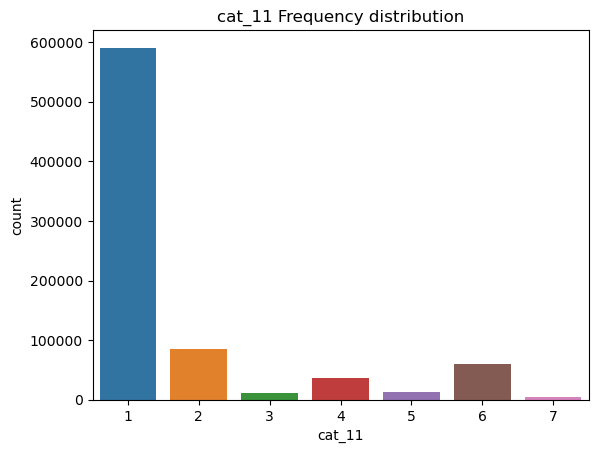

In [7]:
#每个离散型特征的频次分布

discrete_df = X.iloc[:,0:20]

i = 11 #由于i=12时会出现问题，初步判断可能是数据的数量太大，而且存在多个不同值造成，不采用for循环
column_name = f"cat_{i}"  

sns.countplot(x=discrete_df[column_name])  
plt.title(f"{column_name} Frequency distribution")  
plt.show()

In [8]:
#计算各离散型特征之间的相关系数，得出相关性，默认是皮尔逊相关系数

corr = discrete_df.corr()
corr

cat_0     cat_1     cat_2     cat_3     cat_4     cat_5     cat_6  \
cat_0   1.000000  0.208102  0.015516 -0.038847 -0.006756 -0.001782  0.006626   
cat_1   0.208102  1.000000 -0.026804 -0.020708  0.012412  0.000591 -0.017809   
cat_2   0.015516 -0.026804  1.000000  0.009661 -0.162552  0.027532  0.019794   
cat_3  -0.038847 -0.020708  0.009661  1.000000 -0.066083  0.017959 -0.103658   
cat_4  -0.006756  0.012412 -0.162552 -0.066083  1.000000 -0.025616  0.026752   
cat_5  -0.001782  0.000591  0.027532  0.017959 -0.025616  1.000000  0.029021   
cat_6   0.006626 -0.017809  0.019794 -0.103658  0.026752  0.029021  1.000000   
cat_7  -0.024447  0.000578  0.004858  0.340651 -0.028362  0.016002  0.022554   
cat_8  -0.034420 -0.020281  0.013469  0.723553 -0.067988  0.016562 -0.109303   
cat_9  -0.022736  0.010021  0.029980  0.010923  0.070883  0.005752  0.006611   
cat_10 -0.004550 -0.001408 -0.066672 -0.018657 -0.084047  0.011182 -0.015741   
cat_11 -0.012449  0.036048  0.012148 -0.074323 -0.160460  0.019100 -0.007402   
cat_12  0.007968  0.586789 -0.022995 -0.029729  0.022698 -0.001561 -0.036476   
cat_13  0.011676 -0.222775  0.017884  0.060747  0.010170  0.024022  0.043655   
cat_14  0.013535 -0.178678  0.009685  0.046286  0.015922  0.017456  0.036008   
cat_15  0.007932 -0.174614  0.011575  0.044016  0.015175  0.021232  0.034655   
cat_16  0.036418 -0.159521  0.001410  0.035964  0.023883  0.007148  0.035211   
cat_17  0.030966 -0.157952  0.002733  0.035718  0.023266  0.009195  0.034370   
cat_18  0.023148 -0.183070  0.013119  0.048187  0.015890  0.009334  0.041869   
cat_19  0.013377 -0.177851  0.013025  0.046883  0.016753  0.016620  0.039725   

           cat_7     cat_8     cat_9    cat_10    cat_11    cat_12    cat_13  \
cat_0  -0.024447 -0.034420 -0.022736 -0.004550 -0.012449  0.007968  0.011676   
cat_1   0.000578 -0.020281  0.010021 -0.001408  0.036048  0.586789 -0.222775   
cat_2   0.004858  0.013469  0.029980 -0.066672  0.012148 -0.022995  0.017884   
cat_3   0.340651  0.723553  0.010923 -0.018657 -0.074323 -0.029729  0.060747   
cat_4  -0.028362 -0.067988  0.070883 -0.084047 -0.160460  0.022698  0.010170   
cat_5   0.016002  0.016562  0.005752  0.011182  0.019100 -0.001561  0.024022   
cat_6   0.022554 -0.109303  0.006611 -0.015741 -0.007402 -0.036476  0.043655   
cat_7   1.000000  0.436168  0.008221 -0.012902 -0.033129  0.005916  0.025357   
cat_8   0.436168  1.000000  0.005738 -0.012610 -0.058663 -0.027438  0.054714   
cat_9   0.008221  0.005738  1.000000 -0.111727 -0.092039  0.034592 -0.018756   
cat_10 -0.012902 -0.012610 -0.111727  1.000000  0.266430 -0.007860  0.025545   
cat_11 -0.033129 -0.058663 -0.092039  0.266430  1.000000  0.120620 -0.034911   
cat_12  0.005916 -0.027438  0.034592 -0.007860  0.120620  1.000000 -0.383205   
cat_13  0.025357  0.054714 -0.018756  0.025545 -0.034911 -0.383205  1.000000   
cat_14  0.020063  0.041528 -0.018690  0.032911 -0.019211 -0.312108  0.740860   
cat_15  0.018669  0.039585 -0.016990  0.030332 -0.019830 -0.306141  0.721758   
cat_16  0.014970  0.032237 -0.020589  0.044156 -0.004507 -0.282156  0.618221   
cat_17  0.014349  0.031724 -0.019664  0.041843 -0.005540 -0.278837  0.611604   
cat_18  0.017863  0.042076 -0.017839  0.030129 -0.023034 -0.321925  0.771251   
cat_19  0.019111  0.041434 -0.015124  0.025985 -0.026257 -0.313034  0.758695   

          cat_14    cat_15    cat_16    cat_17    cat_18    cat_19  
cat_0   0.013535  0.007932  0.036418  0.030966  0.023148  0.013377  
cat_1  -0.178678 -0.174614 -0.159521 -0.157952 -0.183070 -0.177851  
cat_2   0.009685  0.011575  0.001410  0.002733  0.013119  0.013025  
cat_3   0.046286  0.044016  0.035964  0.035718  0.048187  0.046883  
cat_4   0.015922  0.015175  0.023883  0.023266  0.015890  0.016753  
cat_5   0.017456  0.021232  0.007148  0.009195  0.009334  0.016620  
cat_6   0.036008  0.034655  0.035211  0.034370  0.041869  0.039725  
cat_7   0.020063  0.018669  0.014970  0.014349  0.017863  0.019111  
cat_8   0.041528  0.039585  

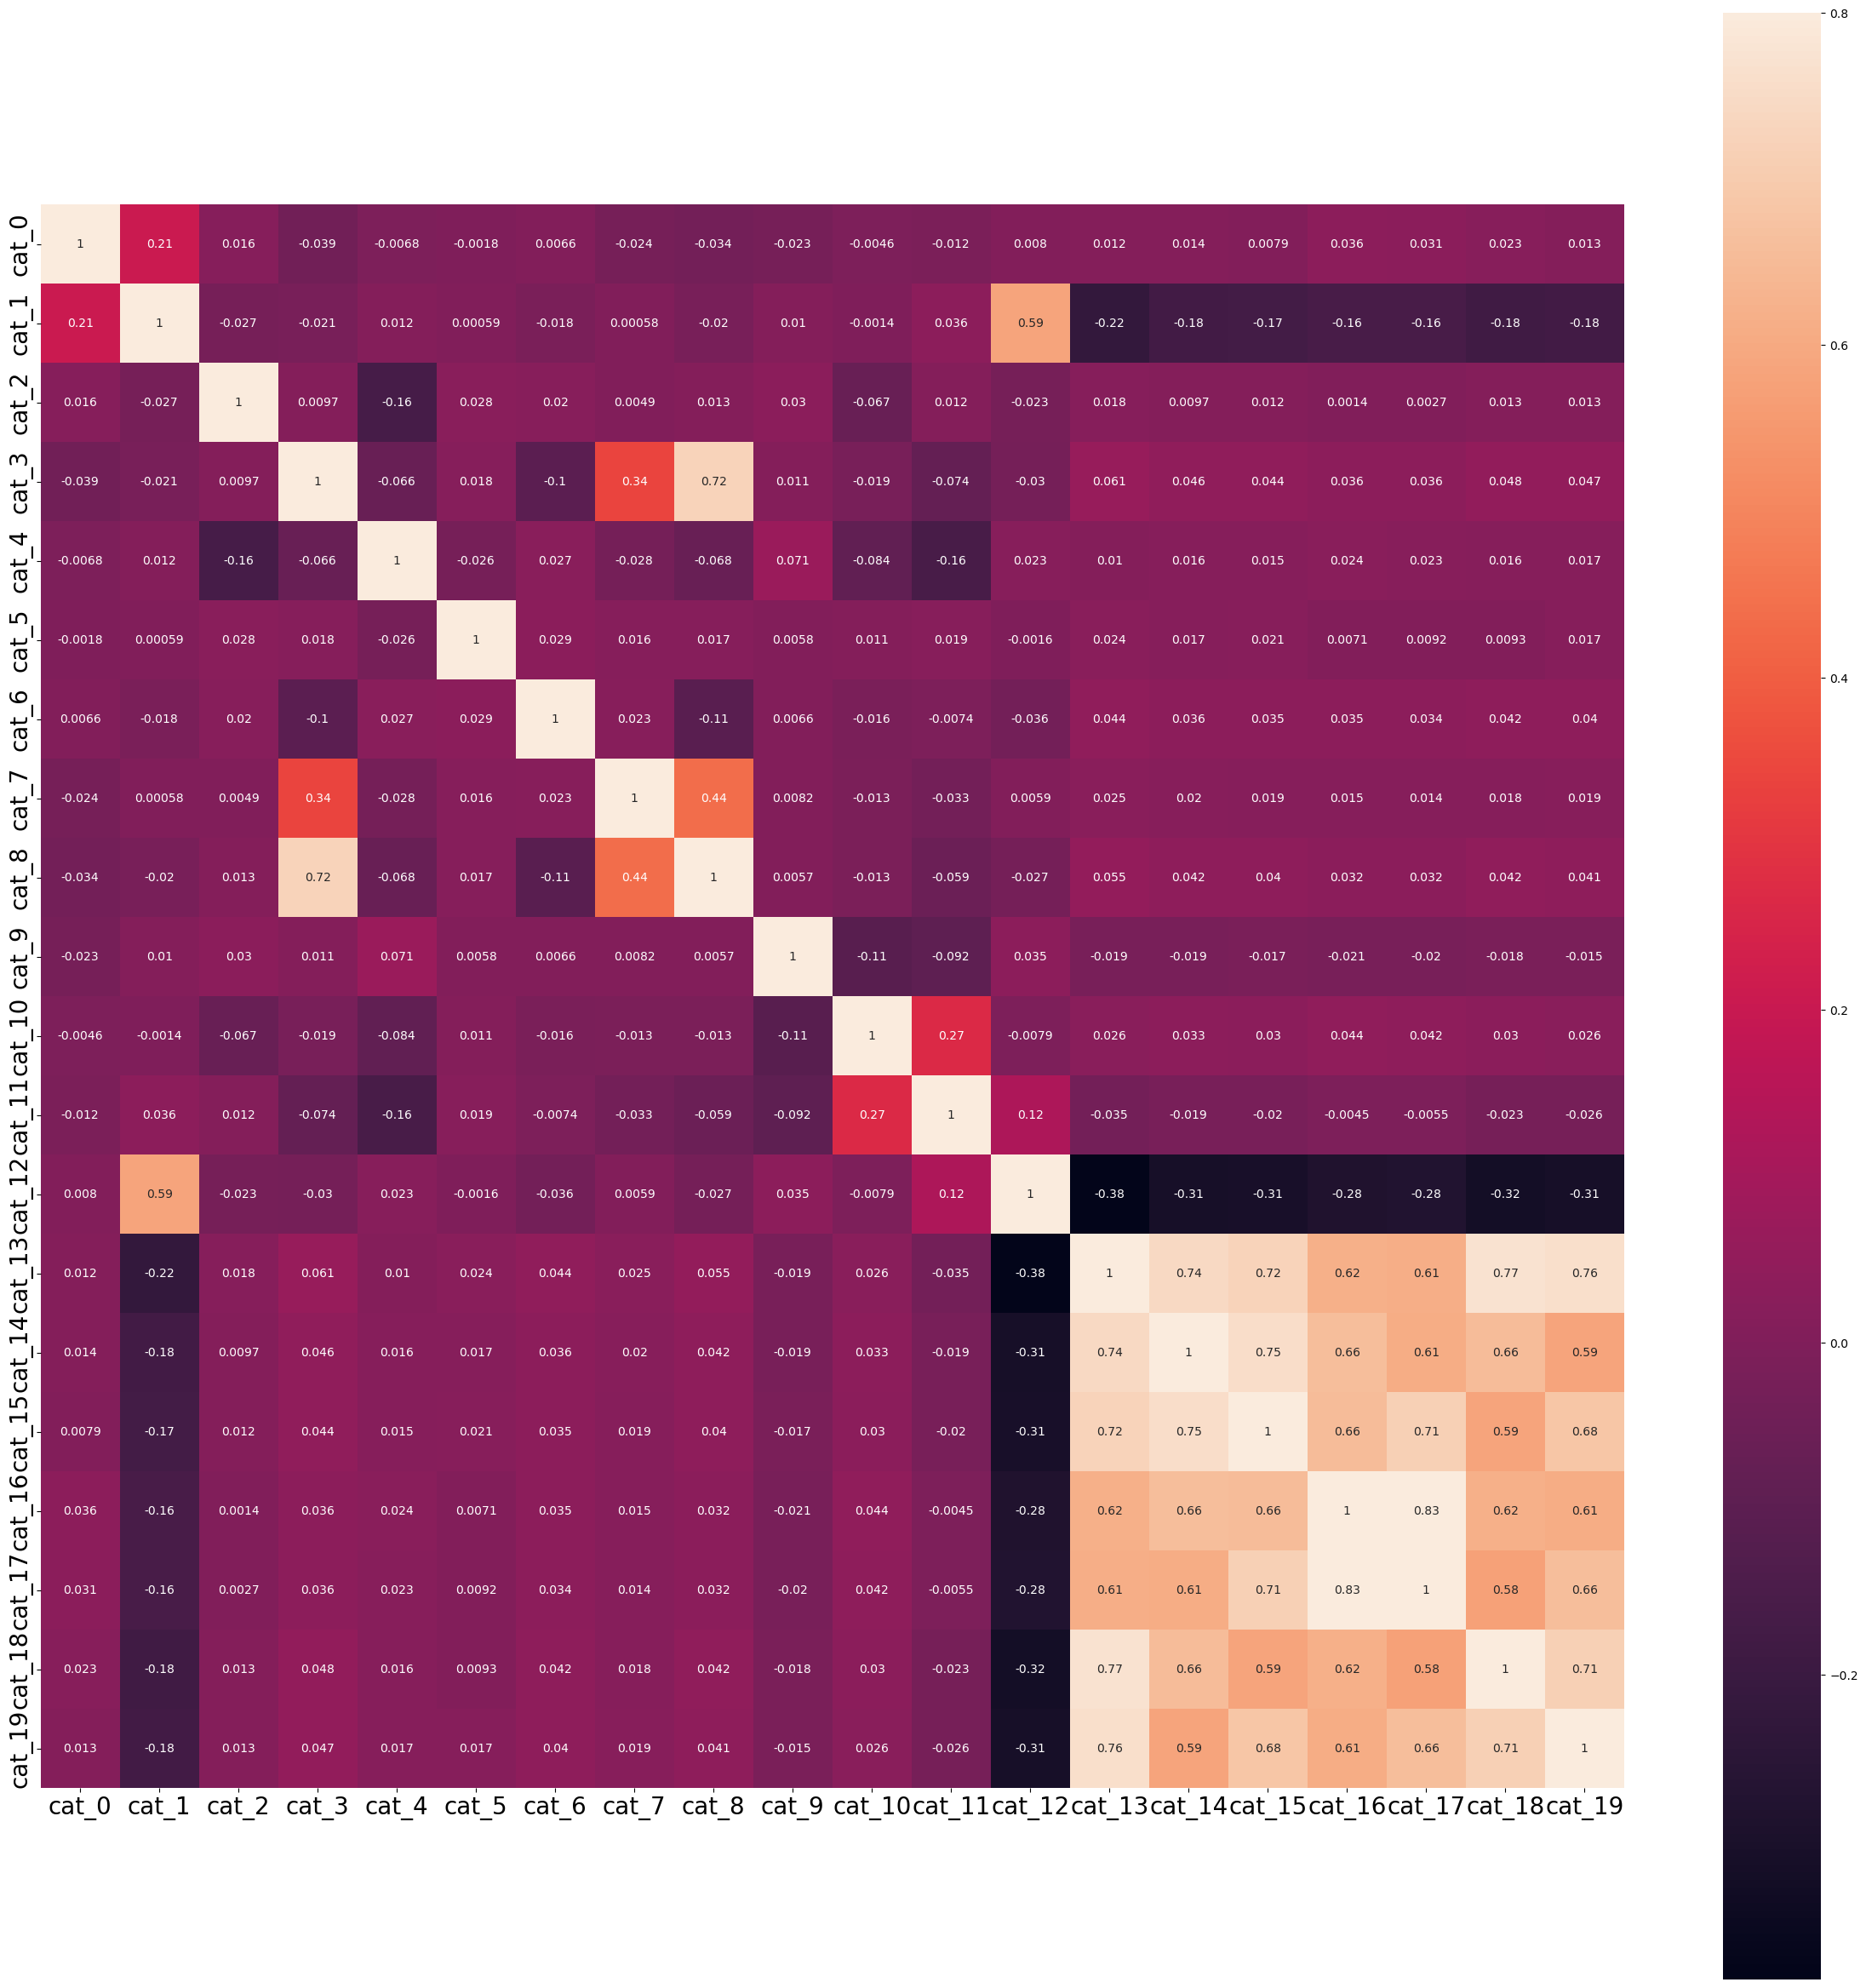

In [9]:
#画出相关系数矩阵的热力图

ax = plt.subplots(figsize=(30, 30))  #调整画布大小
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True)  #画热力图

# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# 数值型特征分析

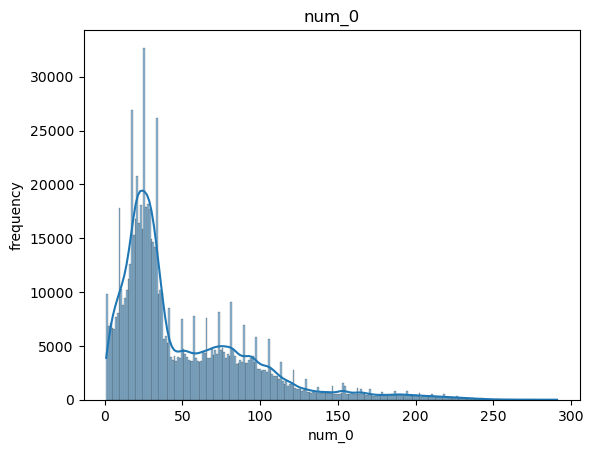

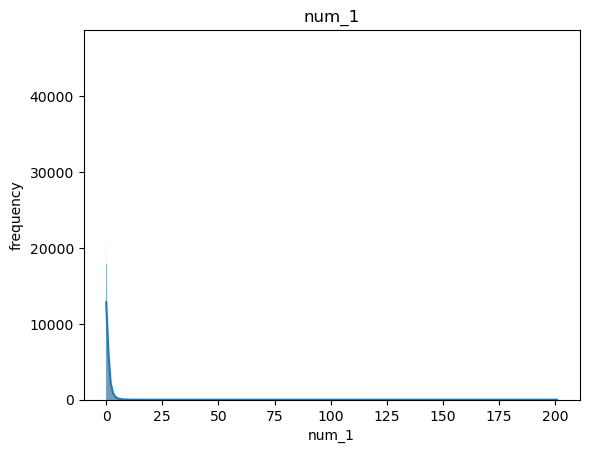

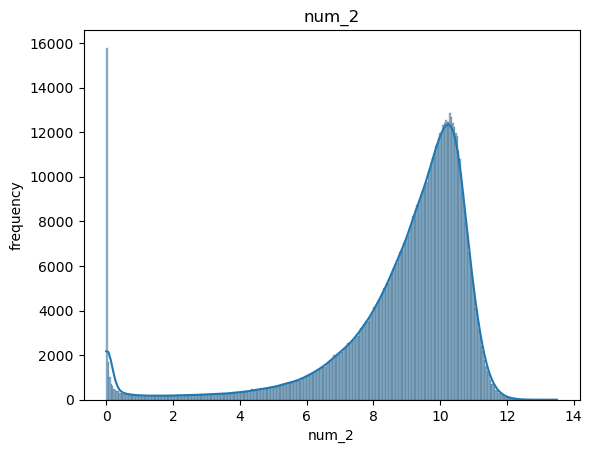

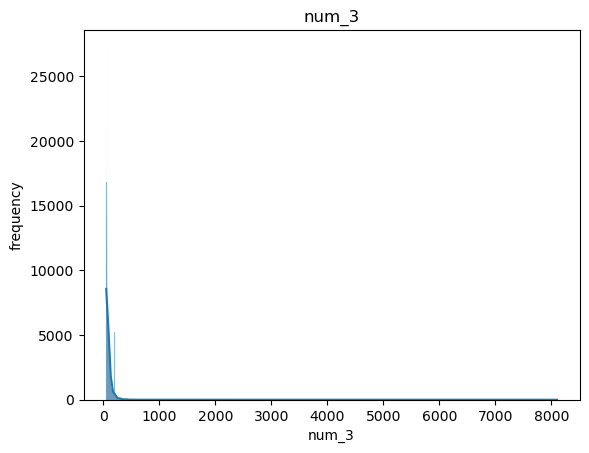

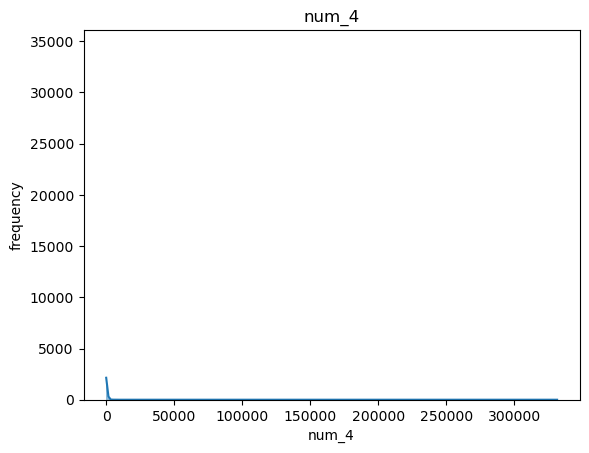

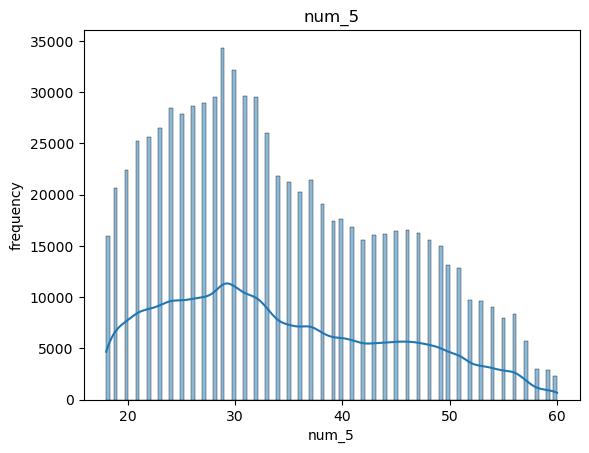

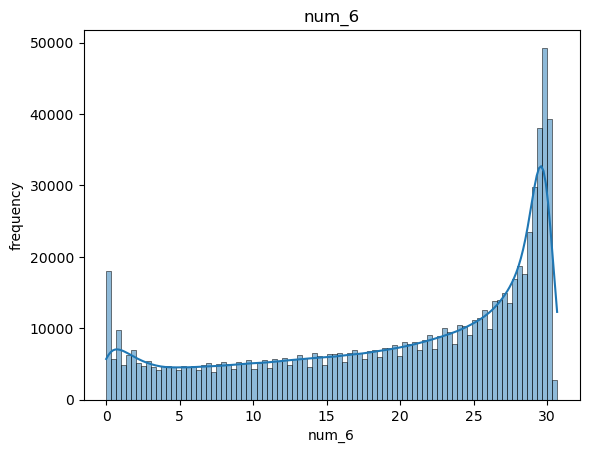

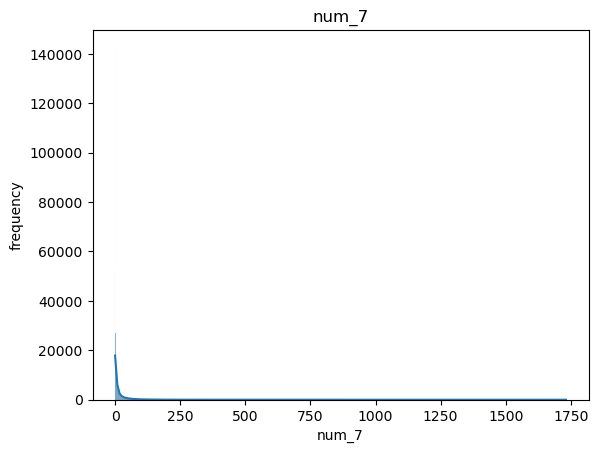

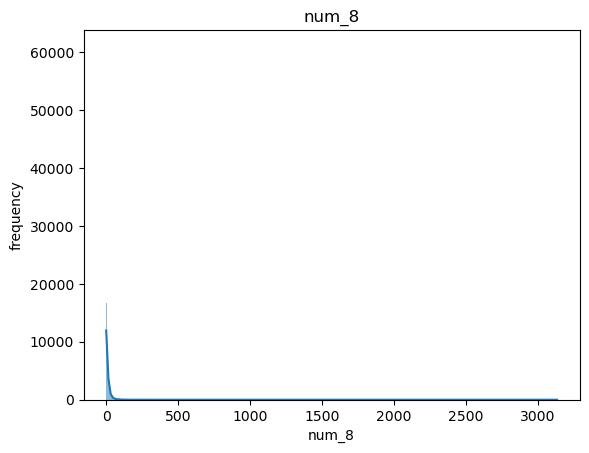

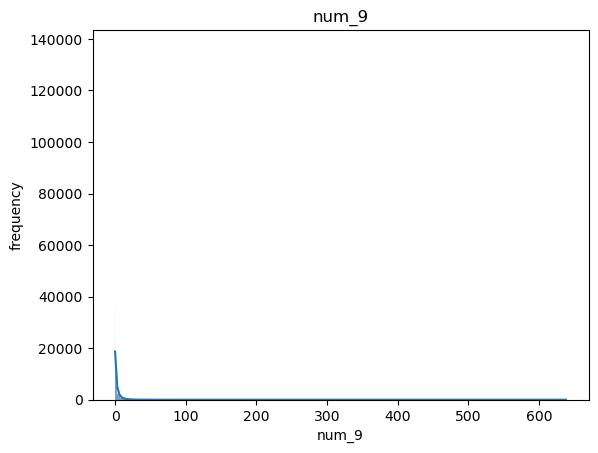

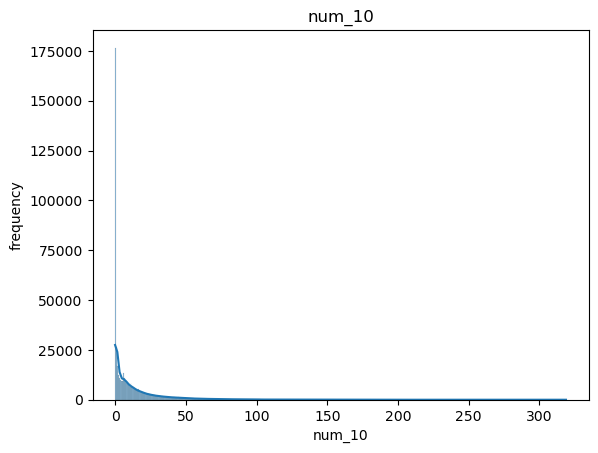

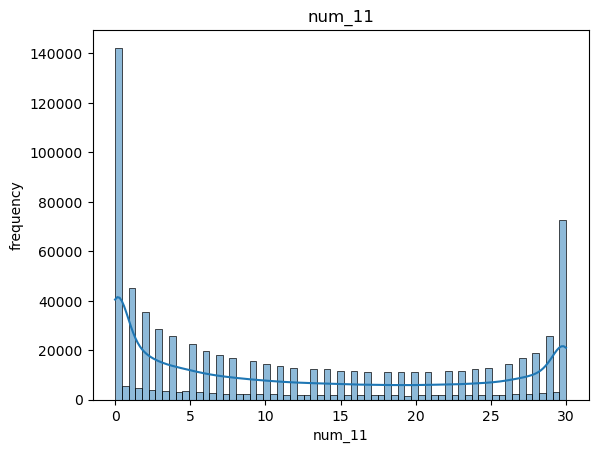

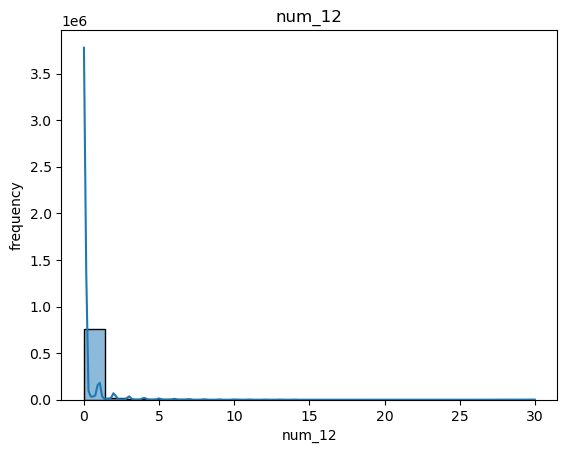

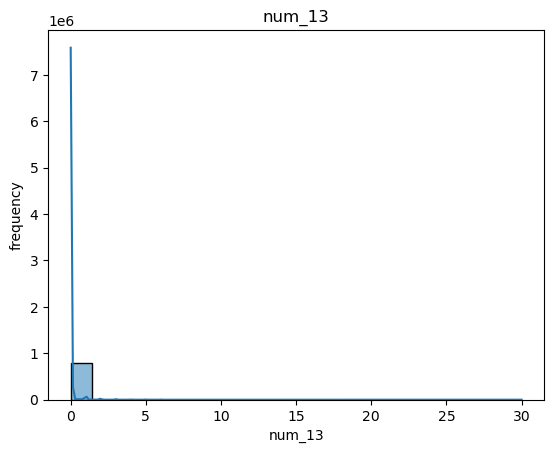

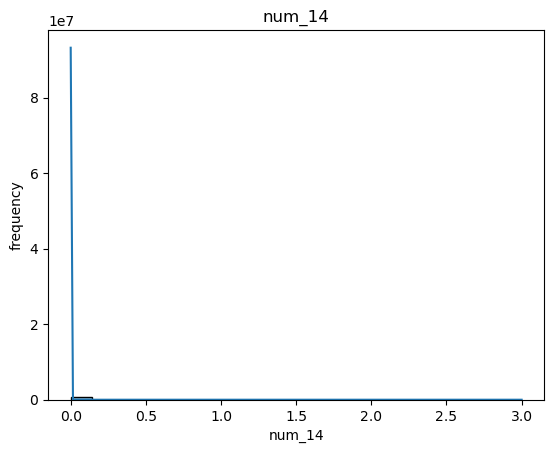

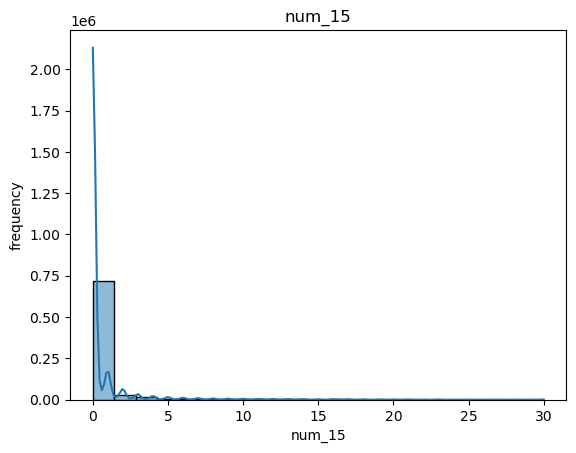

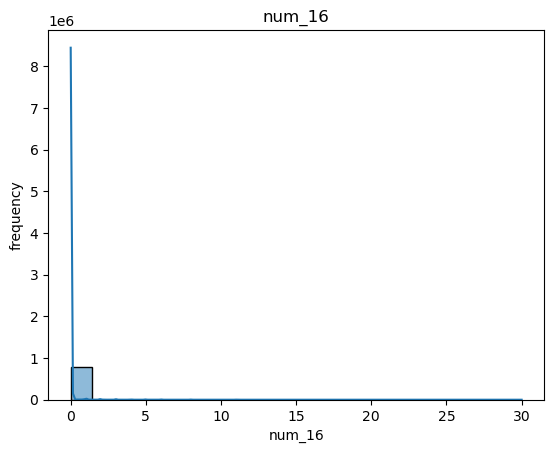

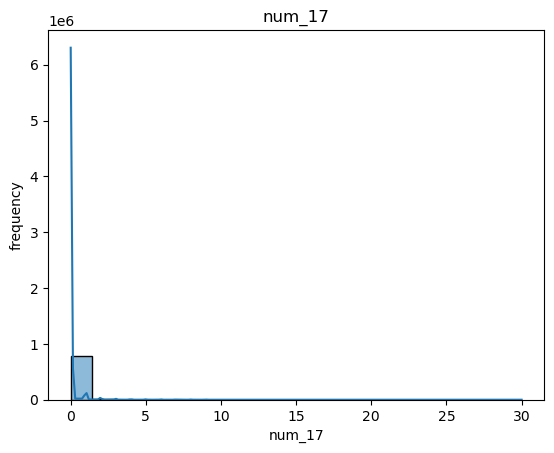

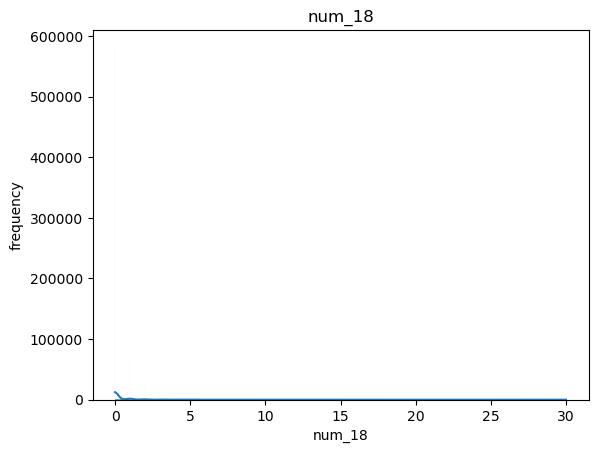

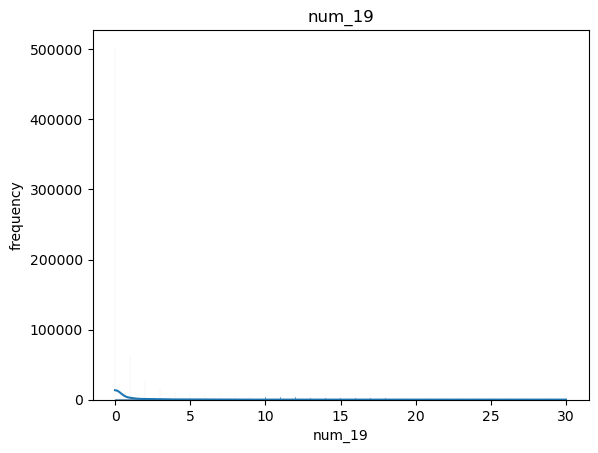

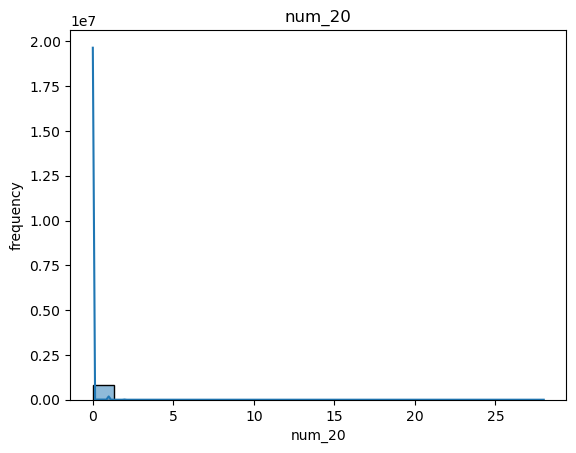

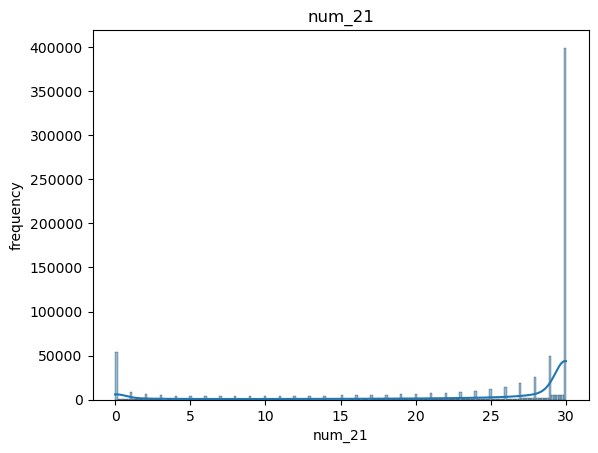

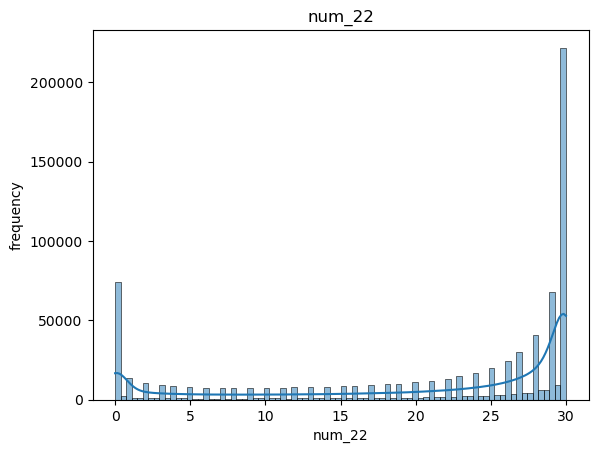

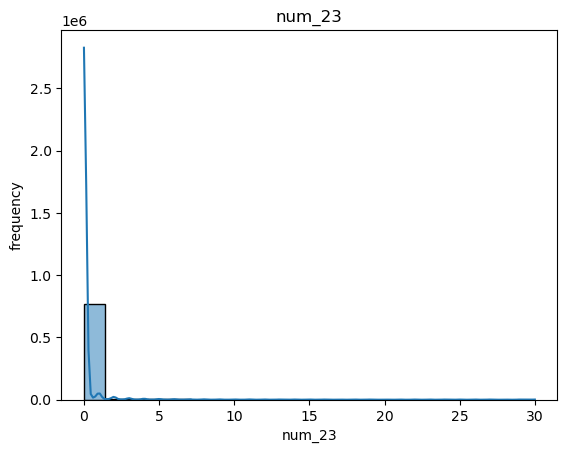

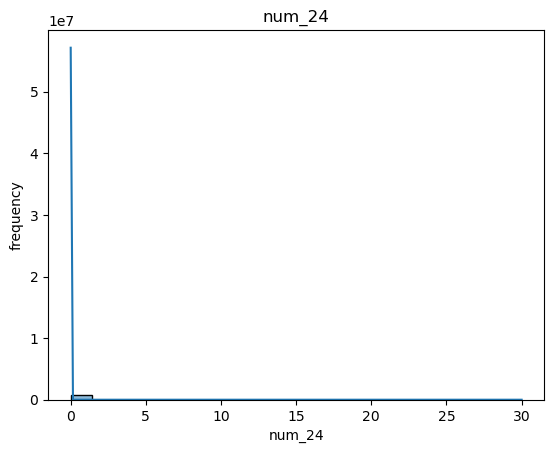

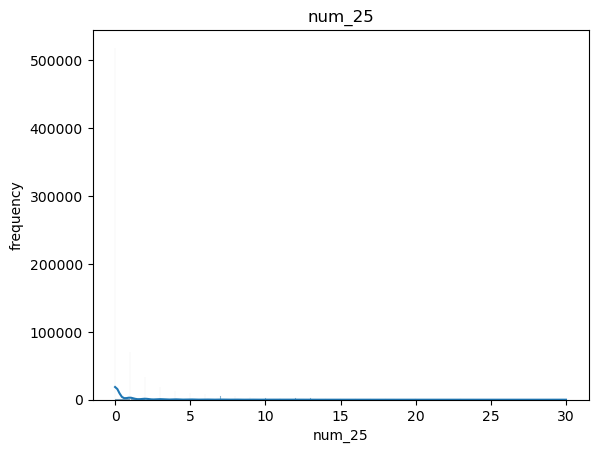

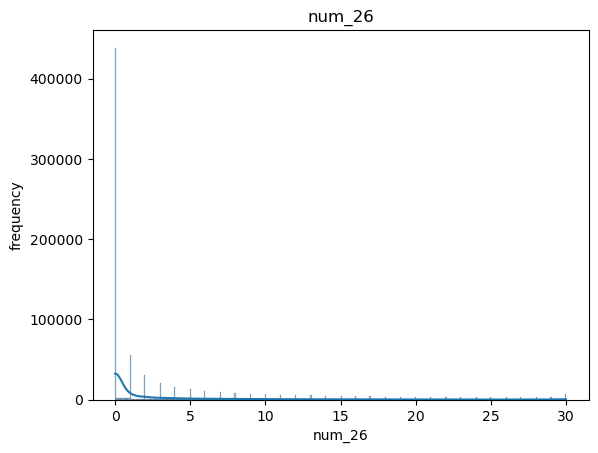

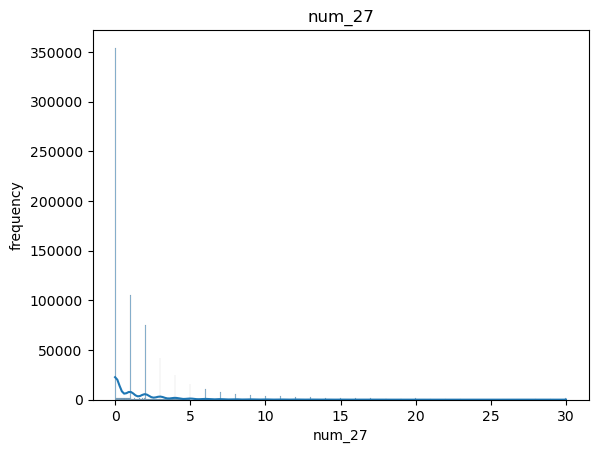

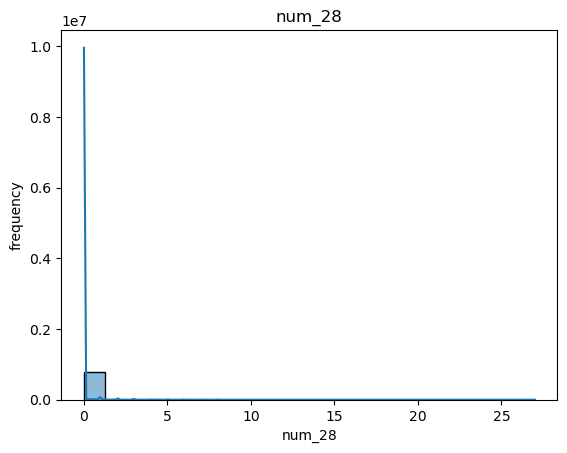

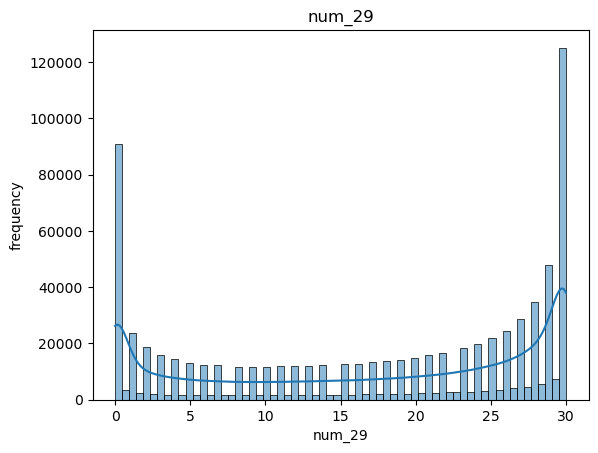

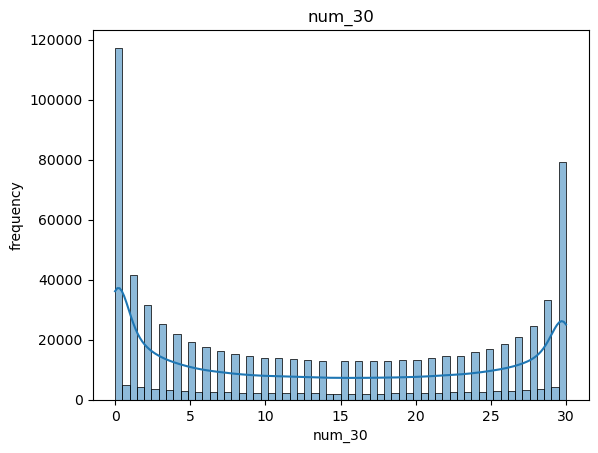

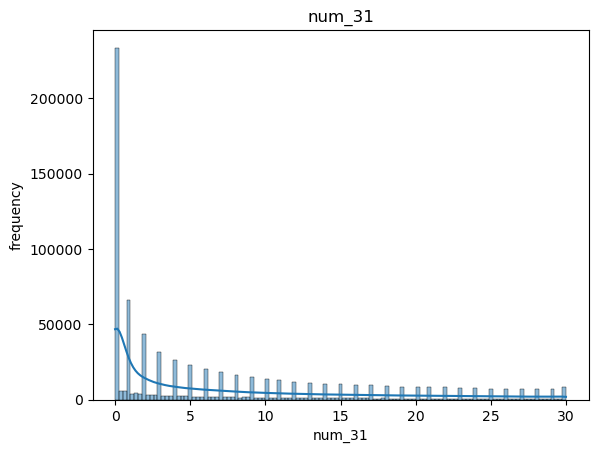

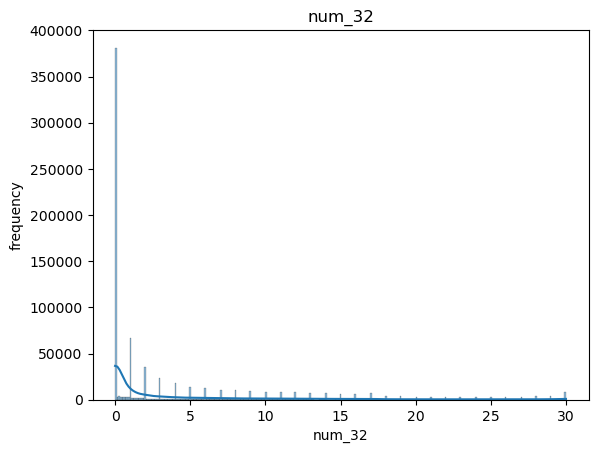

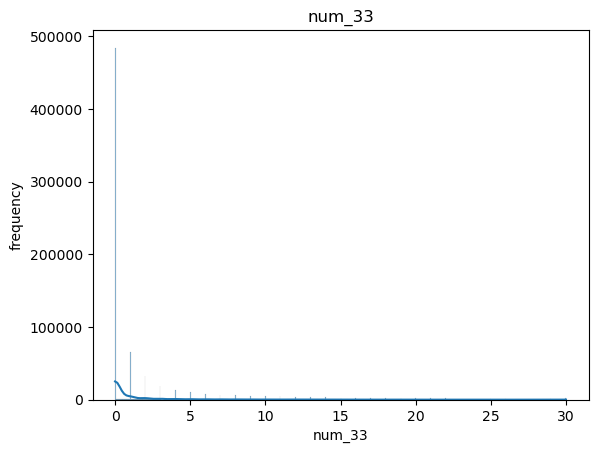

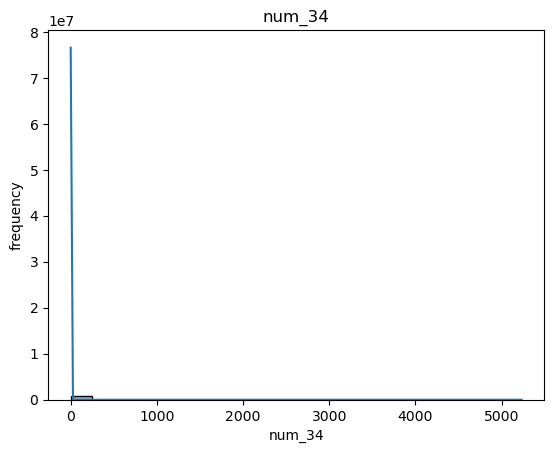

MemoryError: Unable to allocate 208. GiB for an array with shape (27923487336,) and data type float64

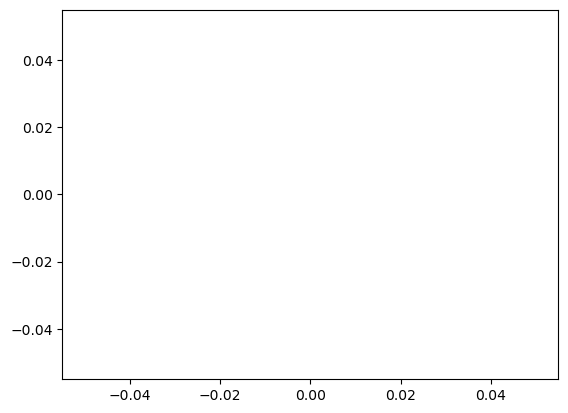

In [10]:

numeric_df = X.iloc[:,20:]

for j in range(37) :
    column_name = f"num_{j}"

    sns.histplot(numeric_df[column_name], kde=True)  
    plt.title(f"num_{j}")  
    plt.xlabel(f"num_{j}")  
    plt.ylabel('frequency')  
    plt.show()


这里应该是因为num_35,36,37的数据量太过庞大，基本上每一组数据都有对应的一个不一样的值，导致cpu内存不足，无法生成对应图像。
由于其数据十分充足，这意味着这个特征具有很高的多样性和差异化。 这种特征可能会对机器学习模型的训练产生重要影响，因为它可以帮助模型更好地理解和解释问题。
但是，如果特征的差异性过大，可能会导致模型过拟合，导致模型过于复杂，这之后可以再继续探索。暂时不对这几个特征进行处理。

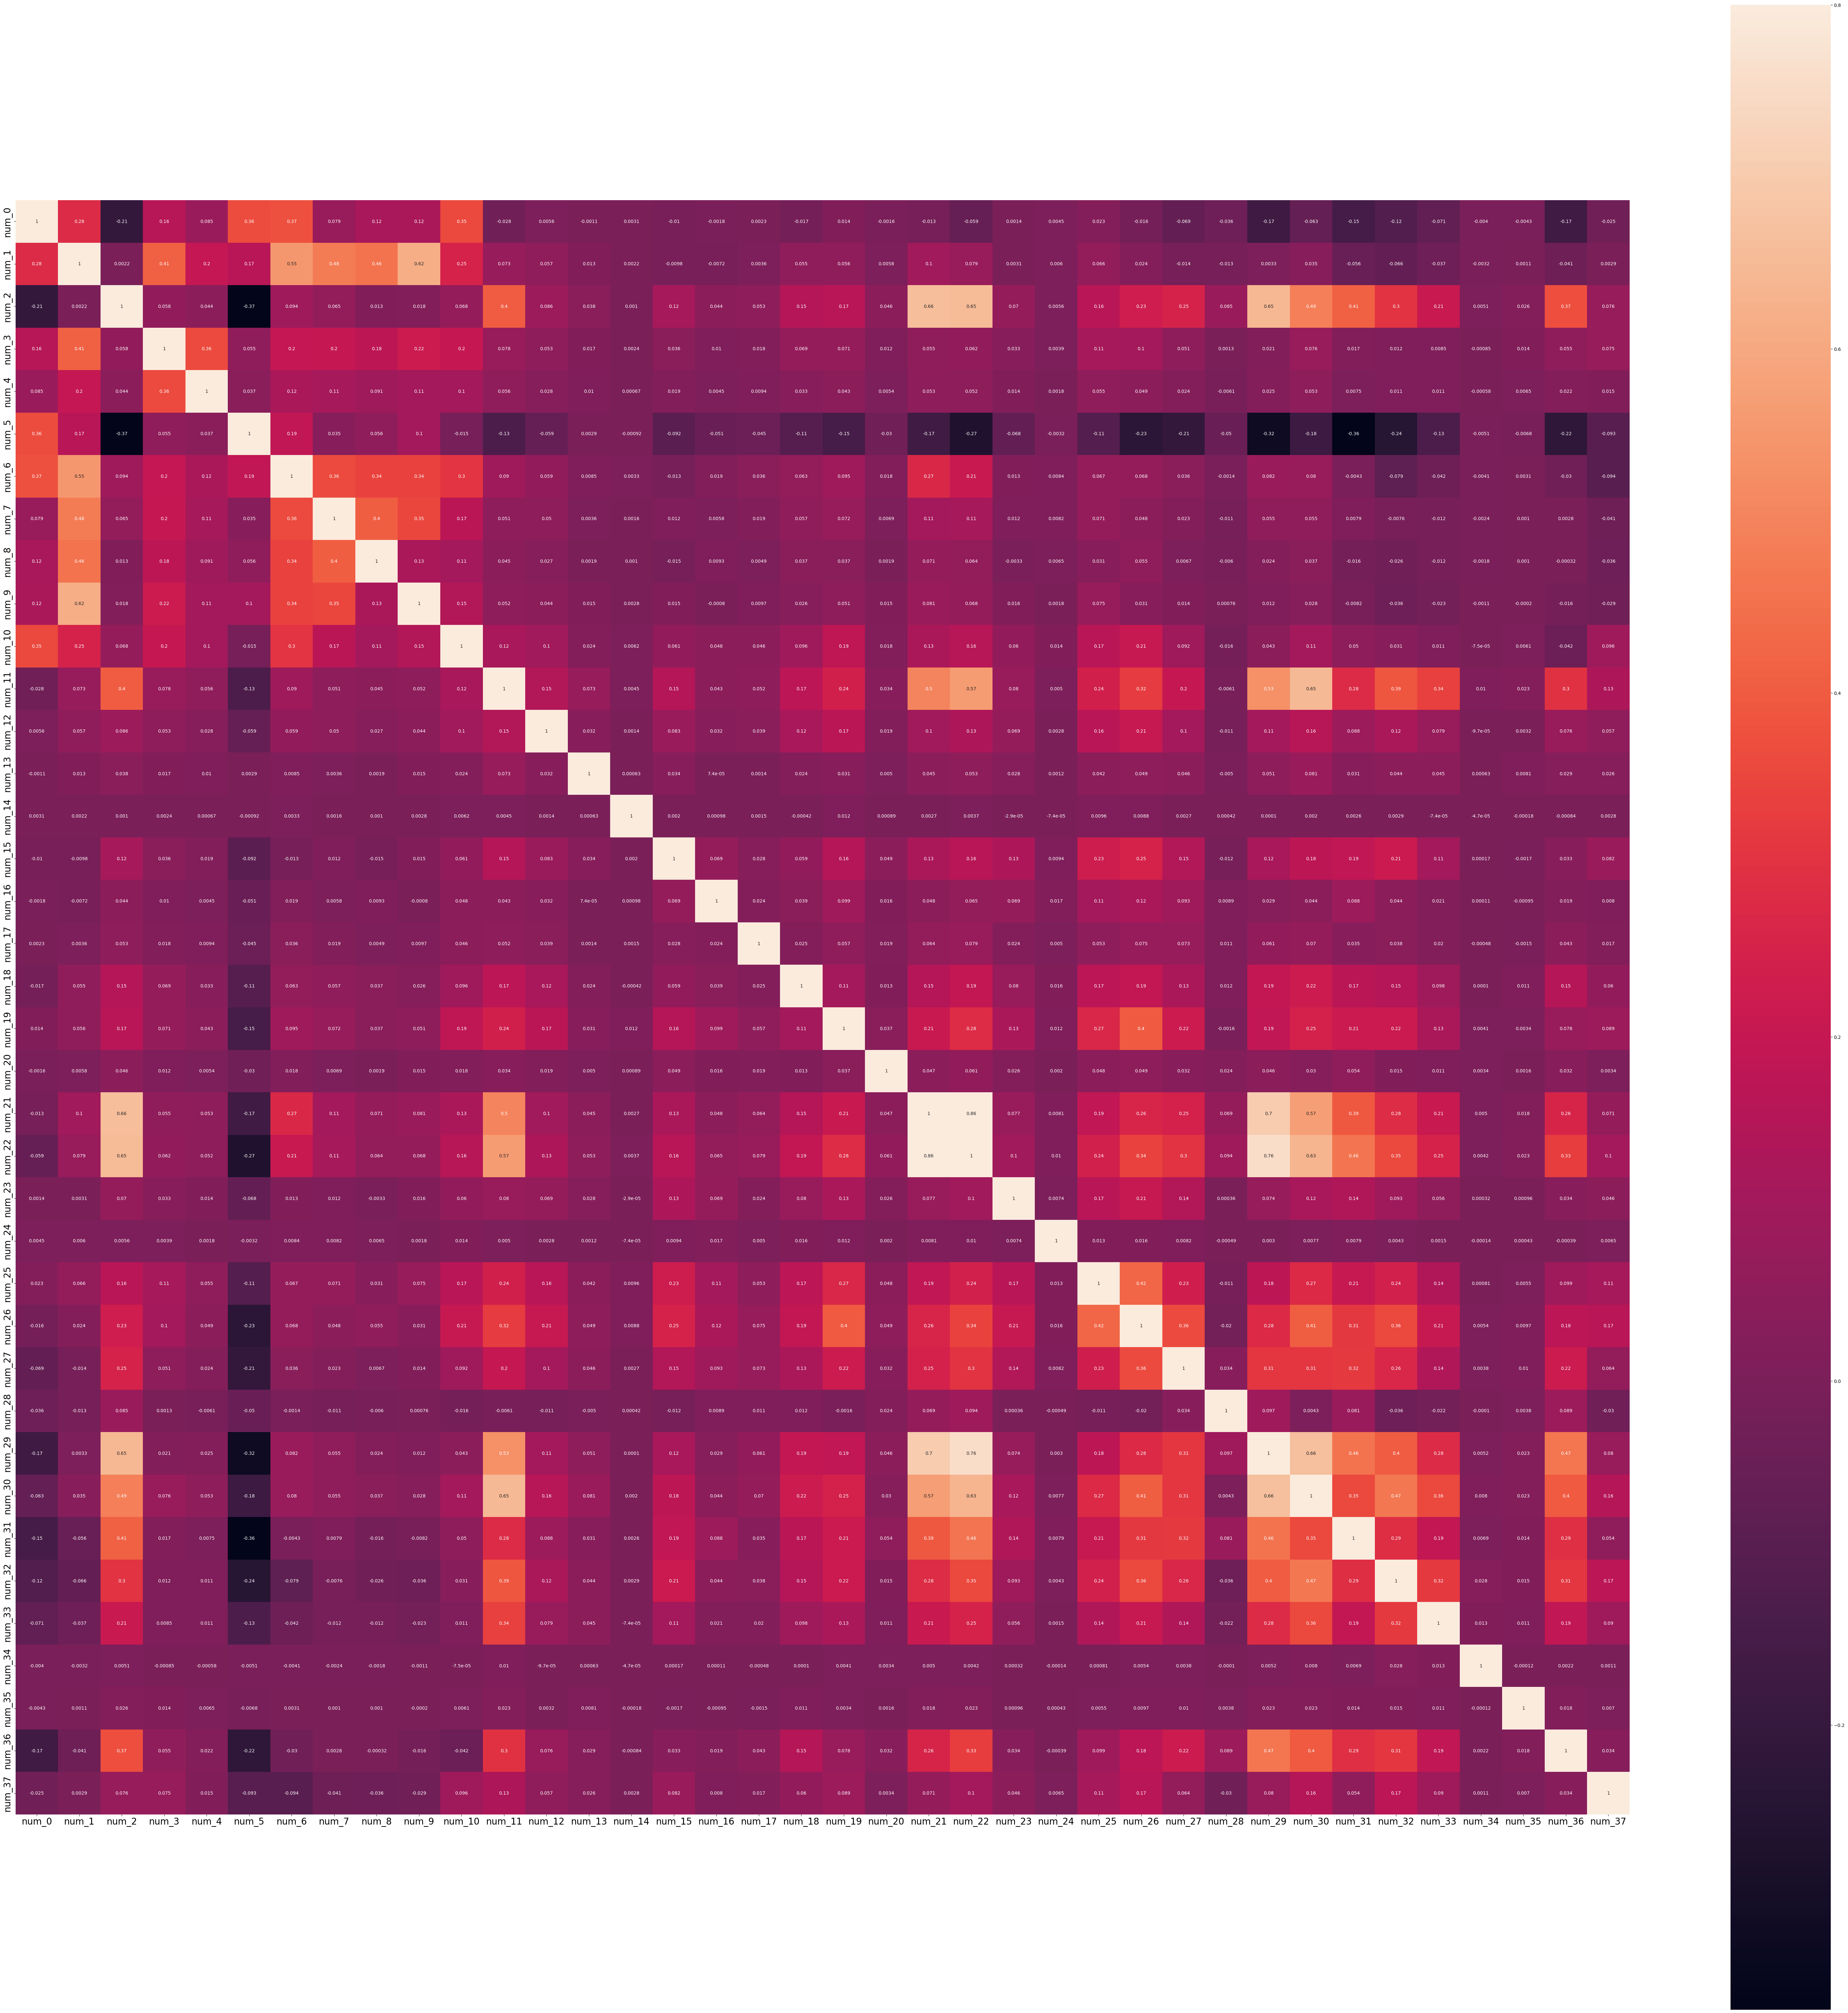

In [11]:

numeric_df = X.iloc[:,20:]

corr_2 = numeric_df.corr()
corr_2

ax_2 = plt.subplots(figsize=(80, 80))  #调整画布大小
ax_2 = sns.heatmap(corr_2, vmax=.8, square=True, annot=True)  #画热力图

# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# 各特征之间可能存在的关系

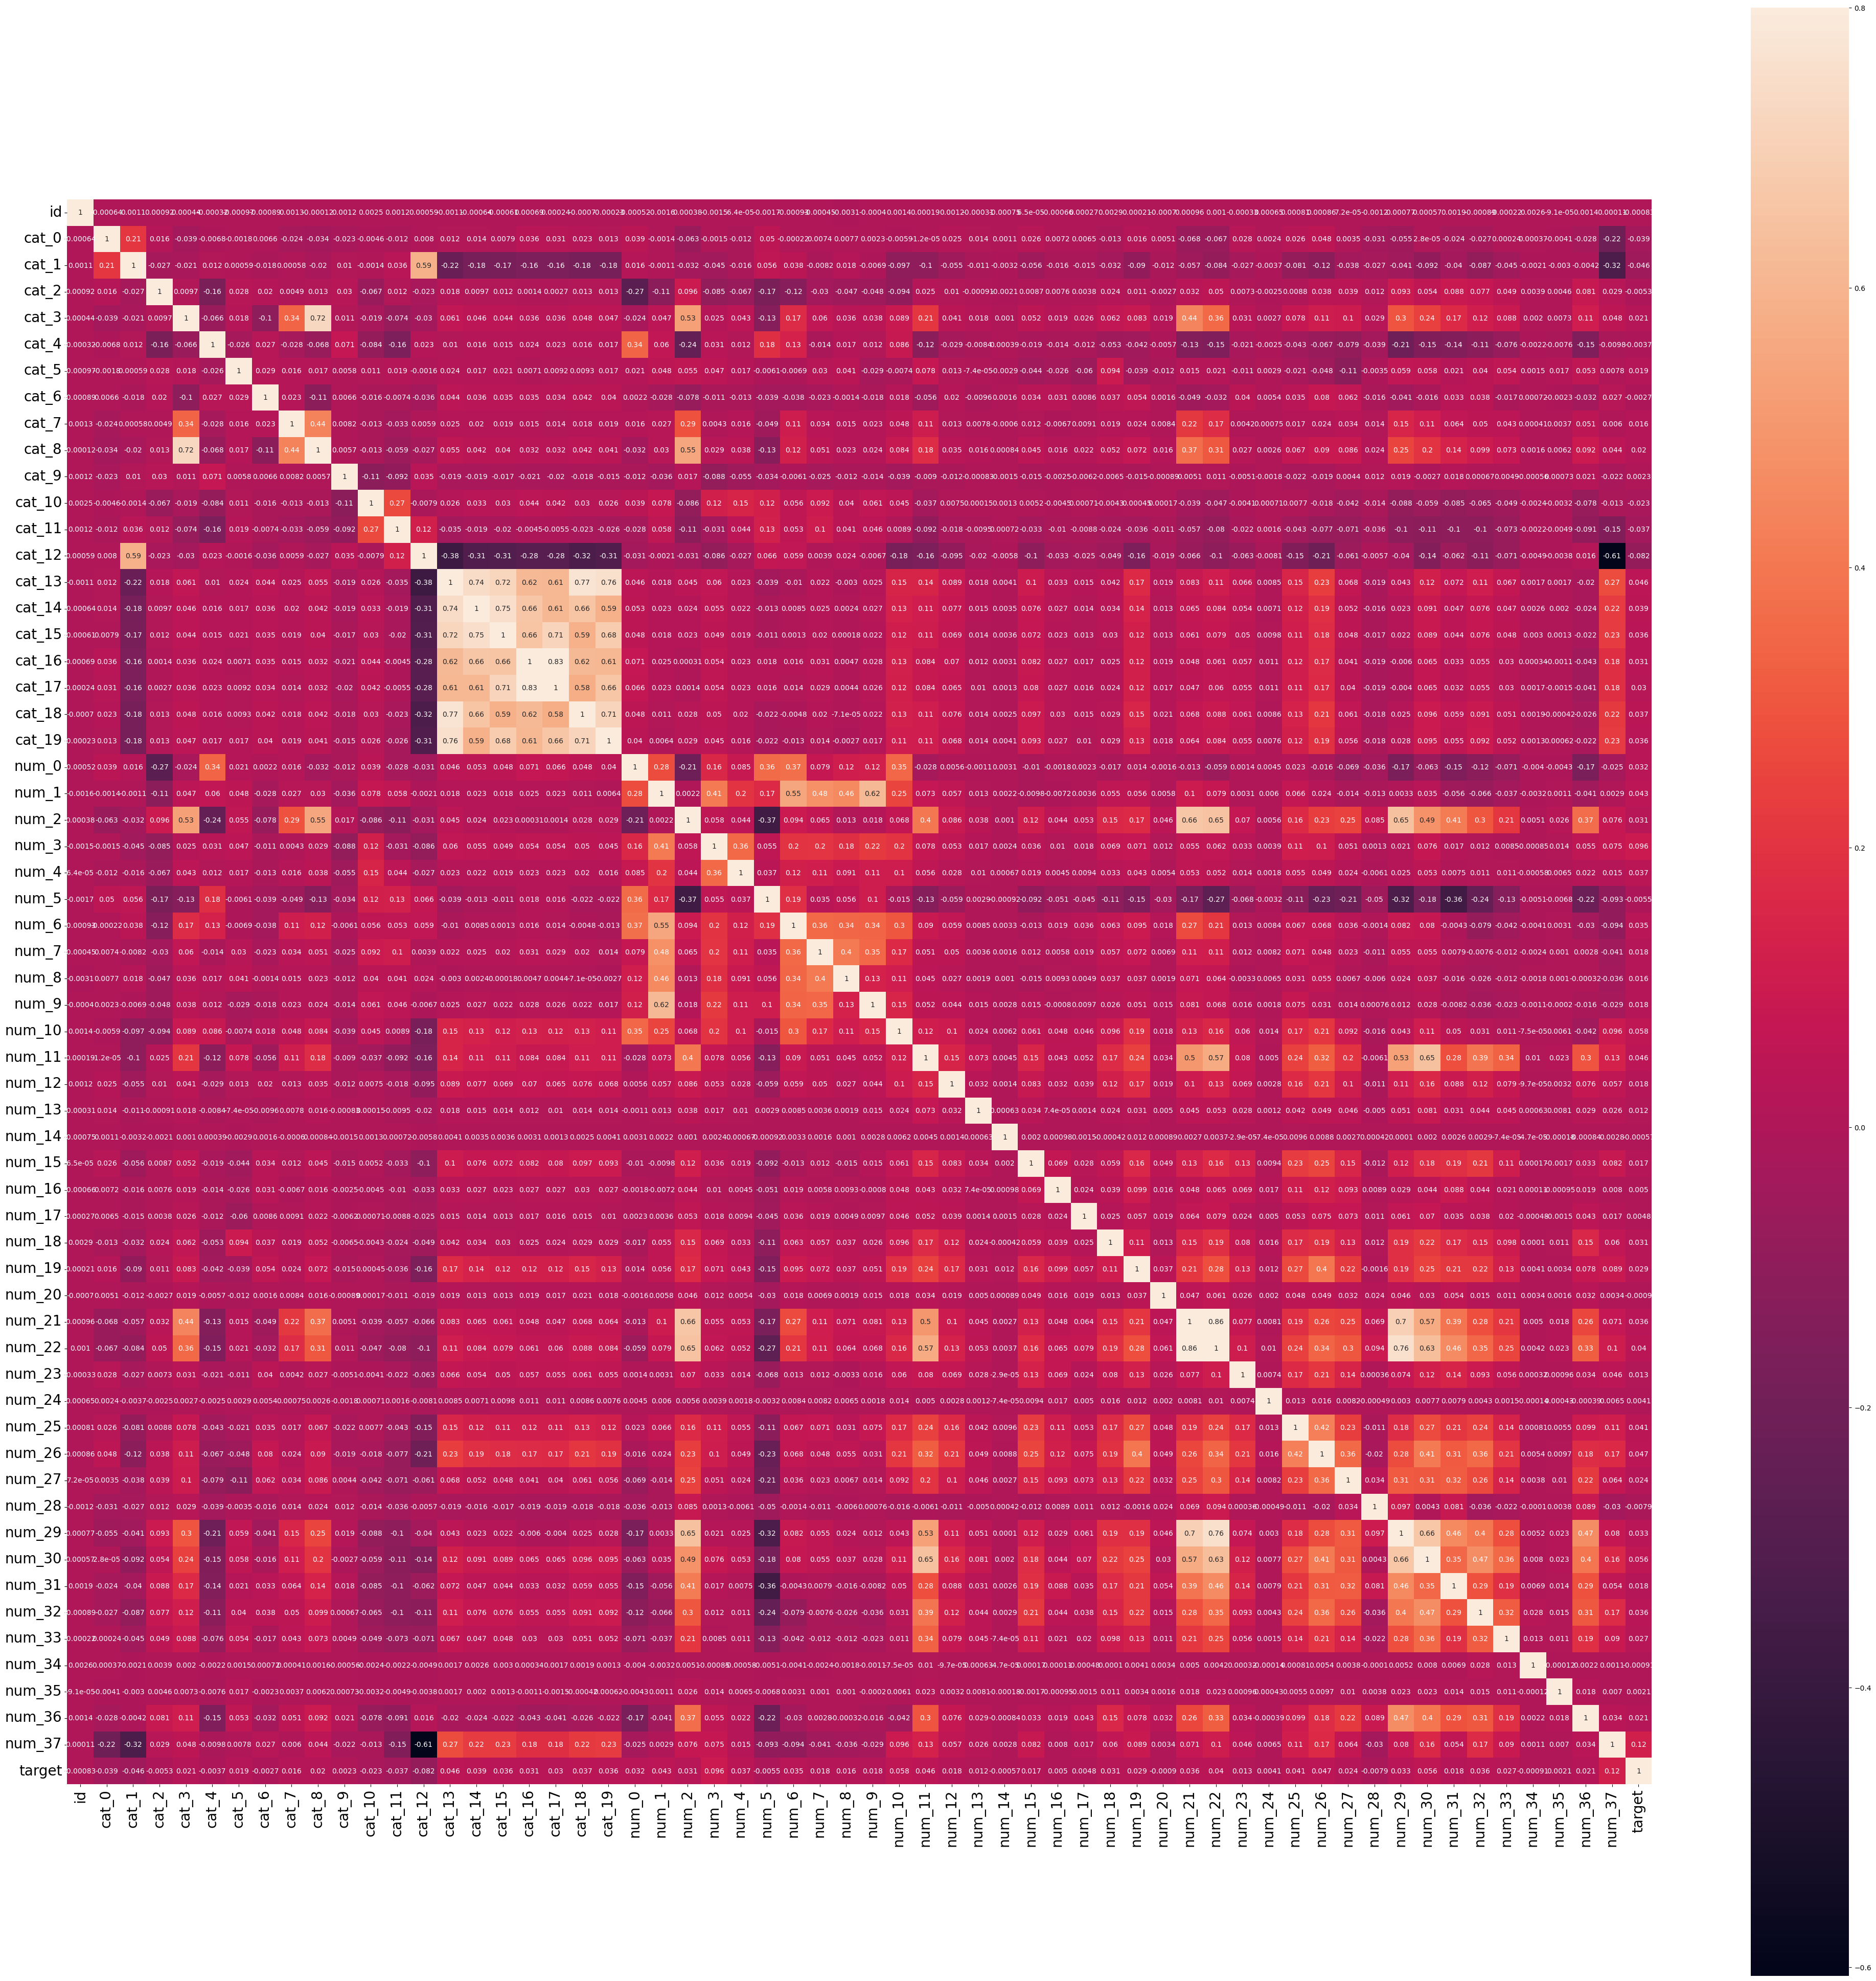

In [12]:
corr_3 = data.corr()

ax_3 = plt.subplots(figsize=(50, 50))  #调整画布大小
ax_3 = sns.heatmap(corr_3, vmax=.8, square=True, annot=True)  #画热力图

# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

其实这个并没有太大意义，明显可以看出离散型特征和数值型特征并没有很大的联系。
//不过也并非毫无收获，能够看到num_37和cat_12之间的负相关性还算比较强。//同时还包括了各个特征与target之间的关系，当然，特征与标签并不会有对应的线性关系

# 模型训练与评估

In [6]:
def classificaton_plot(X_test, y_test, y_pred) :
    pca = PCA(n_components=2)
    X_test = pca.fit_transform(X_test)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='r', label='0')
    ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='b', label='1')
    ax1.legend()
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')
    ax1.set_title('test')

    ax2.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], c='r', label='0')
    ax2.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c='b', label='1')
    ax2.legend()
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    ax2.set_title('pred')

    plt.show()

classificaton_plot基于PCA对数据进行降维，将数据将为二维然后进行可视化绘出散点图，来观察预测的点是否与测试集的真实的点一样。

In [7]:
def roc_auc_plot(clf,x_train,y_train,x_test, y_test):
    train_auc = roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])
    train_fpr, train_tpr, _ = roc_curve(y_train,clf.predict_proba(x_train)[:,1])
    print('train_auc = ', train_auc)
    
    test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
    test_fpr, test_tpr, _ = roc_curve(y_test,clf.predict_proba(x_test)[:,1])
    print('test_auc = ', test_auc)
    
    from matplotlib import pyplot as plt
    plt.plot(train_fpr,train_tpr,label = 'train_roc')
    plt.plot(test_fpr,test_tpr,label = 'test_roc')
    plt.plot([0,1],[0,1],'k--', c='r')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'best')
    plt.show()


roc_auc_plot用于对模型进行评估，分别画出训练集和测试集的roc曲线，并且输出

# LGBMClassifier

In [8]:
# 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [10]:
clf = lgb.LGBMClassifier(n_estimators=50,
                        learning_rate = 0.1,
                        max_depth = 6,
                        num_leaves = 16,
                        verbosity = -1,
                        random_state= 42)

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc')
eval_results = clf.evals_result_

y_pred = clf.predict(X_test)

roc_auc_score(y_test, y_pred)

0.5040210485339806

train_auc =  0.9117450447112645
test_auc =  0.905093223345971


D:\Temp\ipykernel_19040\1621282234.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--', c='r')


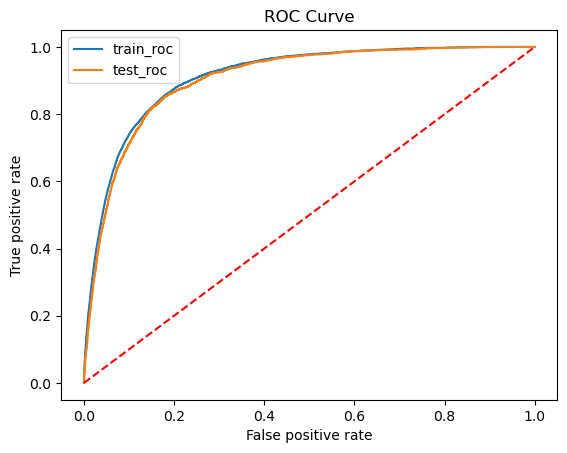

In [11]:
#使用predict_proba 代替predict,使用自定义函数

roc_auc_plot(clf, X_train, y_train, X_test, y_test)

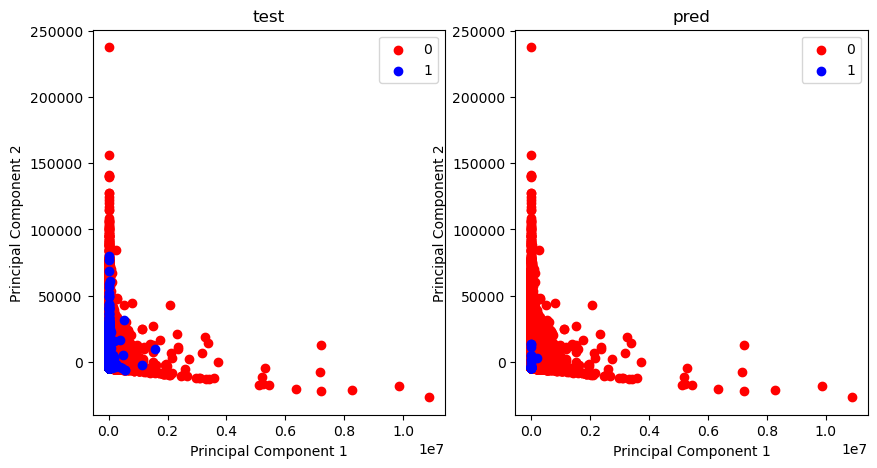

In [12]:
classificaton_plot(X_test, y_test, y_pred)

很明显，测试集的auc得到了显著的提高。事实上，在scikit_learn提供的方法roc_auc_score传入的参数是y_test，y_score。所以如果传入y_pred，在大数据的一个训练预测情况下，得到的auc值比传入y_score低许多。

# 特征工程

# LGBMClassifier自带输出特征重要性

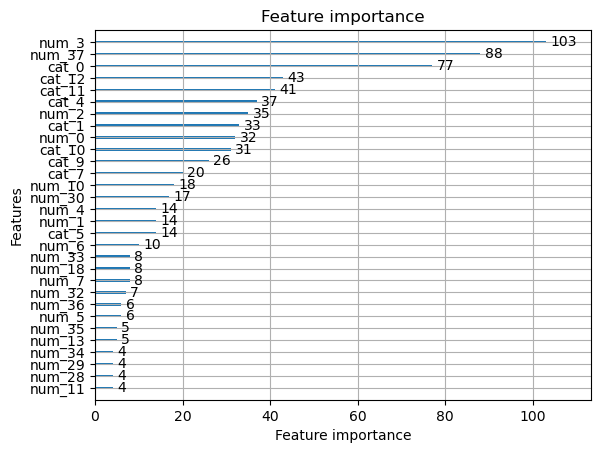

In [14]:
ax = lgb.plot_importance(clf, max_num_features= 30)

# 数值型特征标准化

可以发现num_35，num_36, num_37等数值型特征的数值大小相差较大，容易影响目标结果，使得一些算法无法学习到其他特征，因此必须将数值型数据无量纲化，此处采用标准化的方式处理。

In [15]:
#数值型特征标准化
scaler = StandardScaler()

X.iloc[:,20:] = scaler.fit_transform(X.iloc[:,20:])

In [16]:
X.head()

cat_0  cat_1  cat_2  cat_3  cat_4  cat_5  cat_6  cat_7  cat_8  cat_9  \
0      2    103      9      4      3      1      3      4      4      4   
1      0    177      6      2      2      1      2      4      4      4   
2      7     70      7      4      5      0      3      4      4      4   
3     11    166      7      2      3      1      1      1      2      4   
4      0    178     10      4      3      0      4      4      4      4   

   cat_10  cat_11  cat_12  cat_13  cat_14  cat_15  cat_16  cat_17  cat_18  \
0       1       2     7.0       0       0       0       0       0       0   
1       1       1     7.0       0       0       0       0       0       0   
2       1       1     5.0       0       0       0       0       0       0   
3       1       3     7.0       0       0       0       0       0       0   
4       1       1     7.0       0       0       0       0       0       0   

   cat_19     num_0     num_1     num_2     num_3     num_4     num_5  \
0       0 -0.682950 -0.111552  0.712127 -0.586150 -0.438624  0.545308   
1       0 -0.476303  0.947228 -3.756146  0.203344 -0.040734  0.545308   
2       0  2.600440  0.055650 -0.572300 -0.214308 -0.174493  1.971441   
3       0 -0.131892 -0.094091 -3.777018 -0.581200 -0.554004 -0.405447   
4       0 -0.659989 -0.362954  0.630596 -0.174922 -0.115260 -0.500522   

      num_6     num_7     num_8     num_9    num_10    num_11    num_12  \
0  0.570810  0.188658 -0.169620  0.618179  0.059897 -0.837298 -0.204221   
1  1.066576 -0.081150  0.040795  1.384654 -0.196215 -1.111200 -0.204221   
2  0.491704 -0.400612 -0.318273  0.276130 -0.651506 -1.111200 -0.204221   
3  0.449286  0.069595 -0.354528  0.470211 -0.681147 -1.111200 -0.204221   
4  0.768576 -0.422321 -0.076711 -0.168534 -0.325446  1.353920 -0.204221   

     num_13    num_14    num_15    num_16    num_17    num_18    num_19  \
0 -0.094061 -0.004927 -0.265076 -0.093859 -0.133707 -0.308253 -0.424577   
1 -0.094061 -0.004927 -0.265076 -0.093859 -0.133707 -0.308253 -0.424577   
2 -0.094061 -0.004927 -0.265076 -0.093859 -0.133707 -0.308253 -0.424577   
3 -0.094061 -0.004927 -0.265076 -0.093859 -0.133707 -0.308253 -0.424577   
4 -0.094061 -0.004927  0.495753 -0.093859 -0.133707  0.327673 -0.424577   

     num_20    num_21    num_22    num_23    num_24    num_25    num_26  \
0 -0.094711 -1.522373 -1.655675 -0.153808 -0.015008 -0.391369 -0.527227   
1 -0.094711 -2.043177 -1.934689 -0.153808 -0.015008 -0.391369 -0.527227   
2 -0.094711 -2.436949 -1.934689 -0.153808 -0.015008 -0.391369 -0.527227   
3 -0.094711 -2.430325 -1.934689 -0.153808 -0.015008 -0.391369 -0.527227   
4 -0.094711  0.611639  0.855444 -0.153808 -0.015008 -0.391369 -0.527227   

     num_27    num_28    num_29    num_30    num_31   num_32    num_33  \
0 -0.516459 -0.144708 -1.384629 -0.974368 -0.832059 -0.59046 -0.441186   
1 -0.516459 -0.144708 -1.477854 -1.245444 -0.832059 -0.59046 -0.441186   
2 -0.516459 -0.144708 -1.565428 -1.245444 -0.832059 -0.59046 -0.441186   
3 -0.516459 -0.144708 -1.563464 -1.245444 -0.829490 -0.59046 -0.441186   
4 -0.279703 -0.144708  1.146560  1.465314 -0.832059 -0.59046 -0.441186   

     num_34    num_35    num_36    num_37  
0 -0.009629 -0.035542 -0.540296 -0.530132  
1 -0.009629 -0.035542 -0.540307 -0.265807  
2 -0.009629 -0.035542 -0.540307 -0.479385  
3 -0.009629 -0.035542 -0.540307 -0.419999  
4 -0.009629 -0.035542  0.203419 -0.285363

# 卡方检验

In [17]:
from sklearn.feature_selection import SelectKBest

#筛选出score大于100的

fit = SelectKBest().fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# 合并
df_feature_scores = pd.concat([df_columns, df_scores], axis=1)
# 定义列名
df_feature_scores.columns = ['Feature', 'Score']
# 按照score排序
df_feature_scores.sort_values(by='Score', ascending=False)

# 筛选出满足Score大于100的Feature列的数据
selected_features = df_feature_scores[df_feature_scores['Score'] > 100]['Feature'].tolist()

# 使用这些列名从X中提取相应的数据
X_KBest = X[selected_features]

In [18]:
df_feature_scores.sort_values(by='Score', ascending=False)

Feature         Score
57  num_37  11741.825944
23   num_3   7511.528155
12  cat_12   5465.157435
30  num_10   2732.725617
50  num_30   2484.378625
46  num_26   1757.065778
1    cat_1   1716.179094
13  cat_13   1683.827526
31  num_11   1679.443943
21   num_1   1456.146132
45  num_25   1325.361732
42  num_22   1267.958080
14  cat_14   1246.138447
0    cat_0   1203.346023
11  cat_11   1124.376614
18  cat_18   1115.147464
24   num_4   1077.813965
52  num_32   1062.075296
19  cat_19   1030.953695
41  num_21   1030.465141
15  cat_15   1015.716294
26   num_6    978.434445
49  num_29    875.883010
20   num_0    845.206109
16  cat_16    781.216399
22   num_2    767.264445
38  num_18    758.479422
17  cat_17    729.393470
39  num_19    671.853027
53  num_33    602.919705
47  num_27    444.559997
10  cat_10    414.688587
3    cat_3    367.167910
56  num_36    352.078959
8    cat_8    333.918020
5    cat_5    301.630498
32  num_12    269.740530
51  num_31    255.590803
27   num_7    251.570277
29   num_9    247.587919
35  num_15    238.037747
28   num_8    196.341325
7    cat_7    194.347311
43  num_23    144.396444
33  num_13    106.087391
48  num_28     49.600720
25   num_5     23.797076
2    cat_2     22.725590
36  num_16     19.901283
37  num_17     18.734098
44  num_24     13.559726
4    cat_4     11.052780
6    cat_6      5.881823
9    cat_9      4.120243
55  num_35      3.613168
54  num_34      0.659344
40  num_20      0.648527
34  num_14      0.260814

这里将前面LGBMClassifier得到的重要特征（大于5）一起添加进去，方便模型进行拟合

In [19]:
selected_columns = X[['cat_4', 'cat_9', 'num_35']]#LGBMClassifier选出的重要特征
X_KBest = pd.concat([selected_columns, X_KBest], axis=1)

In [20]:
#将cat中有线性关系的几个特征降维
cat_features = X_KBest[['cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19']]

pca = PCA(n_components=1)
reduced_features = pca.fit_transform(cat_features)

X_KBest['reduced_cat_features'] = reduced_features

X_KBest.drop(['cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19'], axis = 1, inplace=True)

In [21]:
X_KBest.head()

cat_4  cat_9    num_35  cat_0  cat_1  cat_3  cat_5  cat_7  cat_8  cat_10  \
0      3      4 -0.035542      2    103      4      1      4      4       1   
1      2      4 -0.035542      0    177      2      1      4      4       1   
2      5      4 -0.035542      7     70      4      0      4      4       1   
3      3      4 -0.035542     11    166      2      1      1      2       1   
4      3      4 -0.035542      0    178      4      0      4      4       1   

   cat_11  cat_12     num_0     num_1     num_2     num_3     num_4     num_6  \
0       2     7.0 -0.682950 -0.111552  0.712127 -0.586150 -0.438624  0.570810   
1       1     7.0 -0.476303  0.947228 -3.756146  0.203344 -0.040734  1.066576   
2       1     5.0  2.600440  0.055650 -0.572300 -0.214308 -0.174493  0.491704   
3       3     7.0 -0.131892 -0.094091 -3.777018 -0.581200 -0.554004  0.449286   
4       1     7.0 -0.659989 -0.362954  0.630596 -0.174922 -0.115260  0.768576   

      num_7     num_8     num_9    num_10    num_11    num_12    num_13  \
0  0.188658 -0.169620  0.618179  0.059897 -0.837298 -0.204221 -0.094061   
1 -0.081150  0.040795  1.384654 -0.196215 -1.111200 -0.204221 -0.094061   
2 -0.400612 -0.318273  0.276130 -0.651506 -1.111200 -0.204221 -0.094061   
3  0.069595 -0.354528  0.470211 -0.681147 -1.111200 -0.204221 -0.094061   
4 -0.422321 -0.076711 -0.168534 -0.325446  1.353920 -0.204221 -0.094061   

     num_15    num_18    num_19    num_21    num_22    num_23    num_25  \
0 -0.265076 -0.308253 -0.424577 -1.522373 -1.655675 -0.153808 -0.391369   
1 -0.265076 -0.308253 -0.424577 -2.043177 -1.934689 -0.153808 -0.391369   
2 -0.265076 -0.308253 -0.424577 -2.436949 -1.934689 -0.153808 -0.391369   
3 -0.265076 -0.308253 -0.424577 -2.430325 -1.934689 -0.153808 -0.391369   
4  0.495753  0.327673 -0.424577  0.611639  0.855444 -0.153808 -0.391369   

     num_26    num_27    num_29    num_30    num_31   num_32    num_33  \
0 -0.527227 -0.516459 -1.384629 -0.974368 -0.832059 -0.59046 -0.441186   
1 -0.527227 -0.516459 -1.477854 -1.245444 -0.832059 -0.59046 -0.441186   
2 -0.527227 -0.516459 -1.565428 -1.245444 -0.832059 -0.59046 -0.441186   
3 -0.527227 -0.516459 -1.563464 -1.245444 -0.829490 -0.59046 -0.441186   
4 -0.527227 -0.279703  1.146560  1.465314 -0.832059 -0.59046 -0.441186   

     num_36    num_37  reduced_cat_features  
0 -0.540296 -0.530132             -0.367966  
1 -0.540307 -0.265807             -0.367966  
2 -0.540307 -0.479385             -0.367966  
3 -0.540307 -0.419999             -0.367966  
4  0.203419 -0.285363             -0.367966

In [22]:
X_KBest_train, X_KBest_test, y_KBest_train, y_KBest_test = train_test_split(X_KBest, y, test_size=0.2, random_state=6)

In [23]:
clf.fit(X_KBest_train, y_KBest_train, eval_set=[(X_KBest_test, y_KBest_test)], eval_metric='auc')
eval_results = clf.evals_result_

y_KBest_pred = clf.predict(X_KBest_test)

roc_auc_score(y_KBest_test, y_KBest_pred)

0.5040083823697384

train_auc =  0.9116824154937972
test_auc =  0.9037002560499195


D:\Temp\ipykernel_19040\1621282234.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--', c='r')


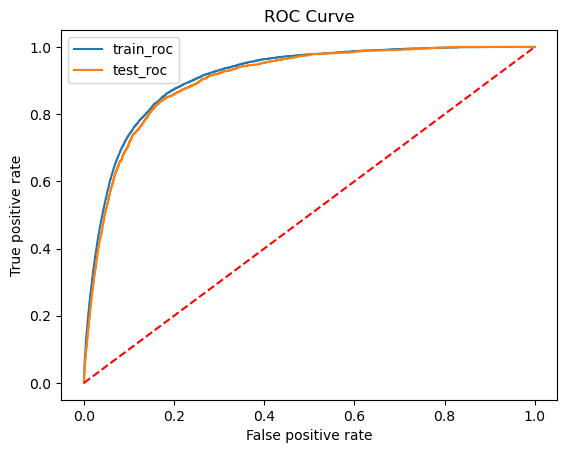

In [24]:
roc_auc_plot(clf, X_KBest_train, y_KBest_train, X_KBest_test, y_KBest_test)

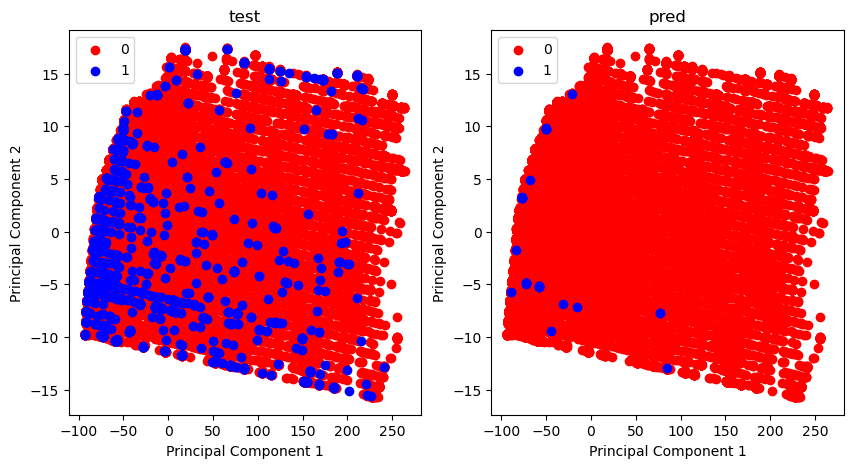

In [25]:
classificaton_plot(X_KBest_test, y_KBest_test, y_KBest_pred)

# 过拟合+欠拟合处理正负样本不平衡问题

In [26]:
#SMOTE 的原始论文建议将 SMOTE 与多数类的随机欠采样结合起来。

#可以更新示例以先对少数类进行过采样，使其具有多数类样本数量的 10%，然后使用随机欠采样将多数类中的样本数量减少到超过 50% 少数类。

over = BorderlineSMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_new, y_new = pipeline.fit_resample(X_KBest_train, y_KBest_train)

In [27]:
X_new.head()

cat_4  cat_9    num_35  cat_0  cat_1  cat_3  cat_5  cat_7  cat_8  cat_10  \
0      3      4 -0.024890      9     17      4      1      4      4       1   
1      3      4 -0.035542     17    114      4      1      4      4       1   
2      5      4 -0.035542     20     43      3      1      3      3       1   
3      5      3 -0.035527      2    141      4      1      4      4       3   
4      2      4 -0.035541     20     43      4      0      4      4       1   

   cat_11    cat_12     num_0     num_1     num_2     num_3     num_4  \
0       1  2.000000 -0.384460 -0.540968  0.915768 -0.307680 -0.265393   
1       1  7.000000 -0.568146 -0.680345  0.598658 -0.740692 -0.323137   
2       1  5.182906  0.488049 -0.703661 -3.811690 -0.592518 -0.242296   
3       1  7.000000 -0.063009  2.102525 -1.038563  0.139461 -0.126808   
4       6  1.000000 -0.751833 -0.768569  0.222539 -0.255872  0.441388   

      num_6     num_7     num_8     num_9    num_10    num_11    num_12  \
0  0.096173 -0.310670 -0.183556 -0.459276 -0.361016 -0.106892  1.048067   
1 -0.708073 -0.409916 -0.281110 -0.459276 -0.378801  1.353920 -0.204221   
2 -0.997259 -0.418448 -0.319395 -0.444968 -0.381823 -1.111200 -0.204221   
3  1.098185  0.337526  0.466803  0.464257 -0.414372 -0.654697 -0.204221   
4 -2.044088 -0.437829 -0.457636 -0.493481 -0.649530 -0.380794 -0.204221   

     num_13    num_15    num_18    num_19    num_21    num_22    num_23  \
0 -0.094061 -0.265076 -0.308253  0.752031  0.611639  0.483426 -0.153808   
1 -0.094061  1.256581 -0.308253 -0.424577  0.306780  0.576431 -0.153808   
2 -0.094061 -0.265076 -0.308253 -0.424577 -2.436949 -1.934689 -0.153808   
3 -0.094061 -0.265076 -0.308253 -0.424577 -1.725612 -1.469667 -0.153808   
4 -0.094061 -0.265076 -0.308253 -0.424577  0.306780  0.576431 -0.153808   

     num_25    num_26    num_27    num_29    num_30    num_31    num_32  \
0 -0.119588  0.943871 -0.042948  1.056161  1.465314  0.823322  0.387676   
1 -0.119588  1.090981 -0.279703  0.875361  0.923163 -0.004368  1.365811   
2 -0.346955 -0.527227 -0.516459 -1.565428 -1.245444 -0.832059 -0.590460   
3 -0.391369 -0.527227 -0.516459 -1.294229 -1.064726 -0.713818 -0.590460   
4 -0.391369 -0.380117 -0.516459  0.875361  1.194238 -0.832059 -0.590460   

     num_33    num_36    num_37  reduced_cat_features  
0 -0.441186  0.381188 -0.254724             -0.367966  
1 -0.247258 -0.540307 -0.346315             -0.367966  
2 -0.441186 -0.540307 -0.434551             -0.367966  
3 -0.441186 -0.535640 -0.465771             -0.367966  
4 -0.441186 -0.138020  0.752800             -0.367966

In [28]:
clf.fit(X_new, y_new, eval_set=[(X_KBest_test, y_KBest_test)], eval_metric='auc')
eval_results = clf.evals_result_

y_new_pred = clf.predict(X_KBest_test)

roc_auc_score(y_KBest_test, y_KBest_pred)

0.5040083823697384

train_auc =  0.9667181121952224
test_auc =  0.8828256102804889


D:\Temp\ipykernel_19040\1621282234.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--', c='r')


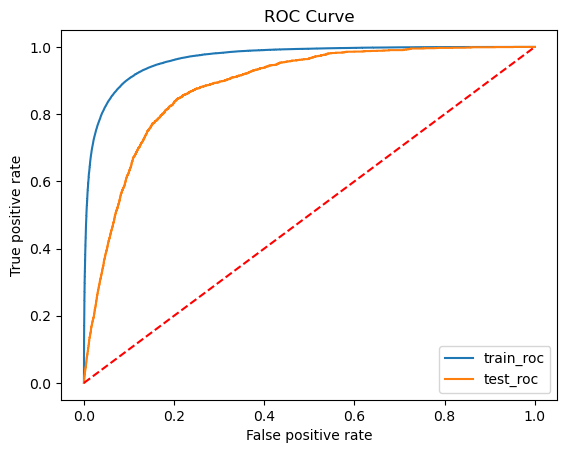

In [29]:
roc_auc_plot(clf, X_new, y_new, X_KBest_test, y_KBest_test)

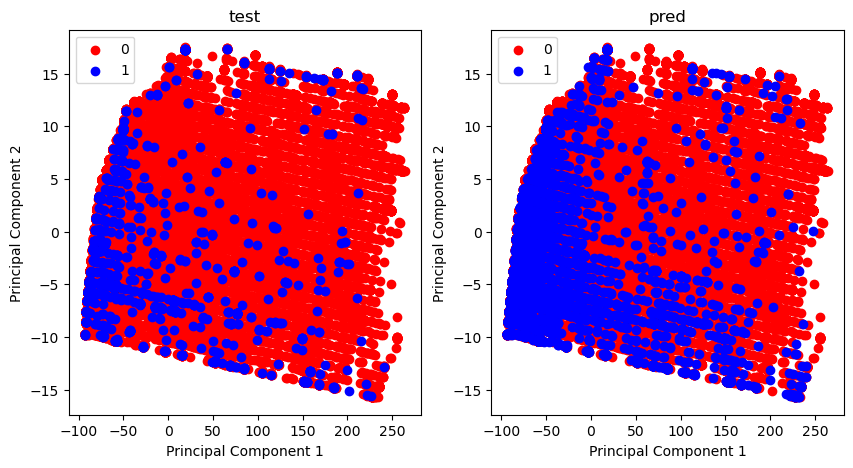

In [30]:
classificaton_plot(X_KBest_test, y_KBest_test, y_new_pred)

# 模型调参优化

n_estimators=1000, max_auc=0.9055583850597142


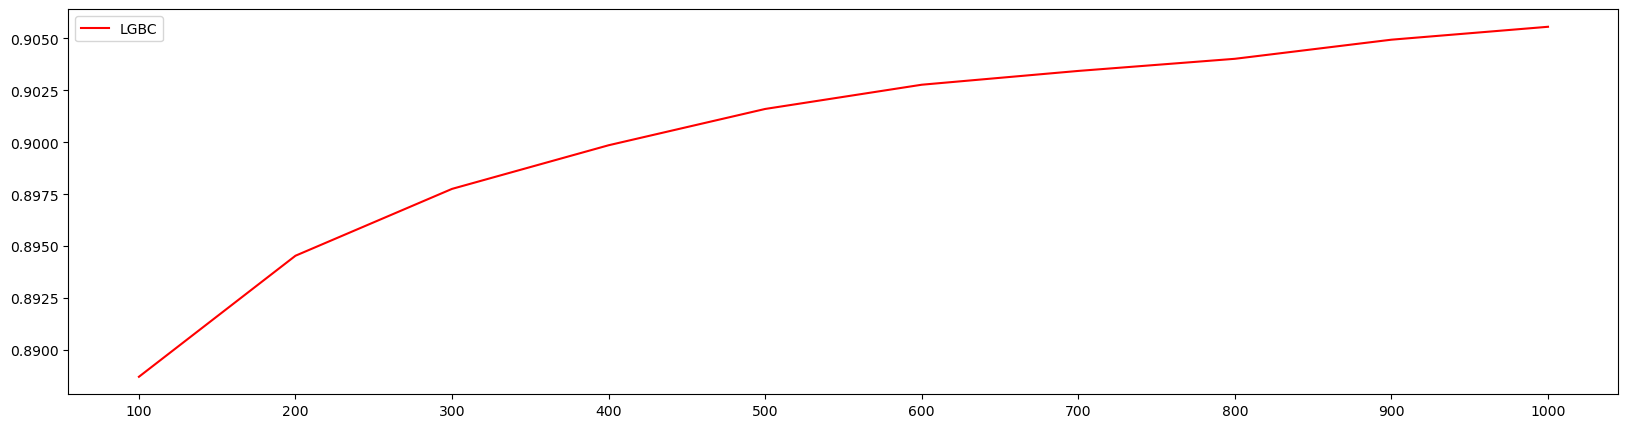

In [31]:
import matplotlib.pyplot as plt

# 通过观察auc大小调参，找到最佳n_estimators
def adjust(x_train,y_train,x_test, y_test):
    axisx = range(100,1001,100)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=i,
                                        learning_rate = 0.1,
                                        max_depth = 6,
                                        num_leaves = 16,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('n_estimators={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

learning_rate=0.2, max_auc=0.9016214769073968


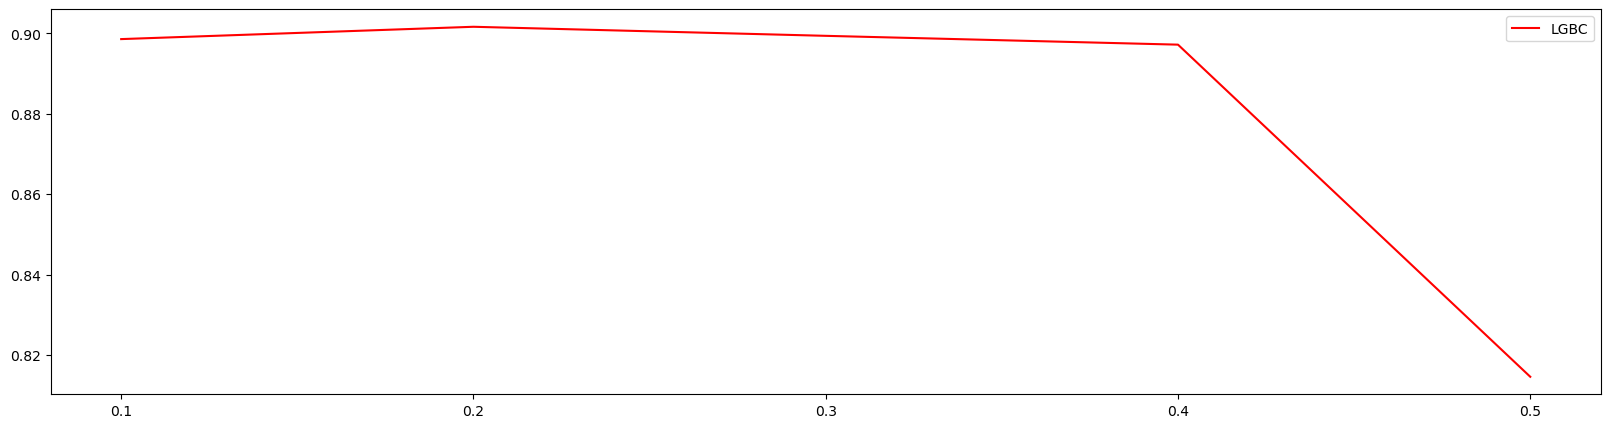

In [54]:
import numpy as np
def adjust(x_train,y_train,x_test, y_test):
    axisx = np.linspace(0.1, 0.5, 5)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = i,
                                        max_depth = 4,
                                        num_leaves = 16,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('learning_rate={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

min_child_samples=110, max_auc=0.904413816994184


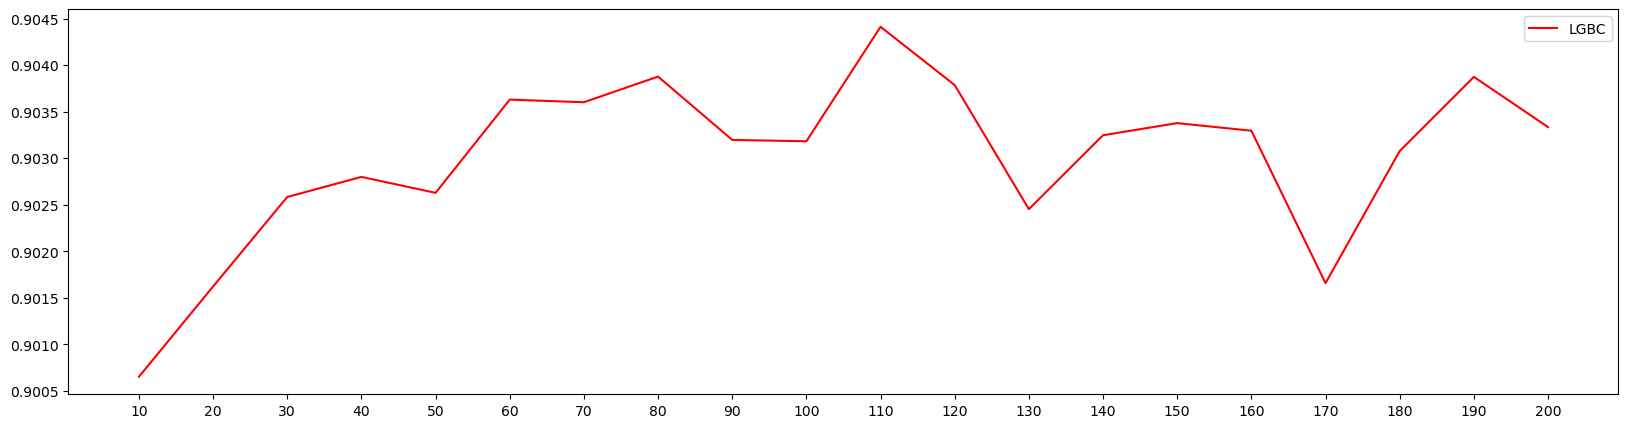

In [55]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = range(10,201,10)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = 4,
                                        num_leaves = 16,
                                        min_child_samples= i,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('min_child_samples={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

min_child_weight=0.18888888888888888, max_auc=0.9049879037980628


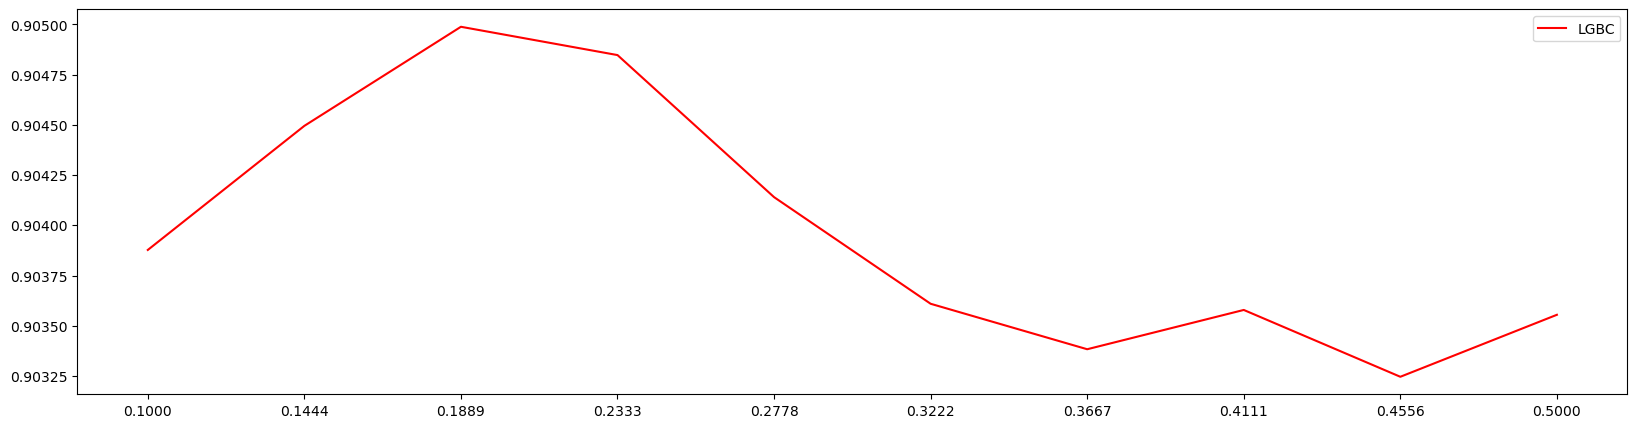

In [58]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = np.linspace(0.1,0.5,10)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = 4,
                                        num_leaves = 16,
                                        min_child_samples= 110,
                                        min_child_weight= i,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('min_child_weight={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

max_depth=13, max_auc=0.9059146759927451


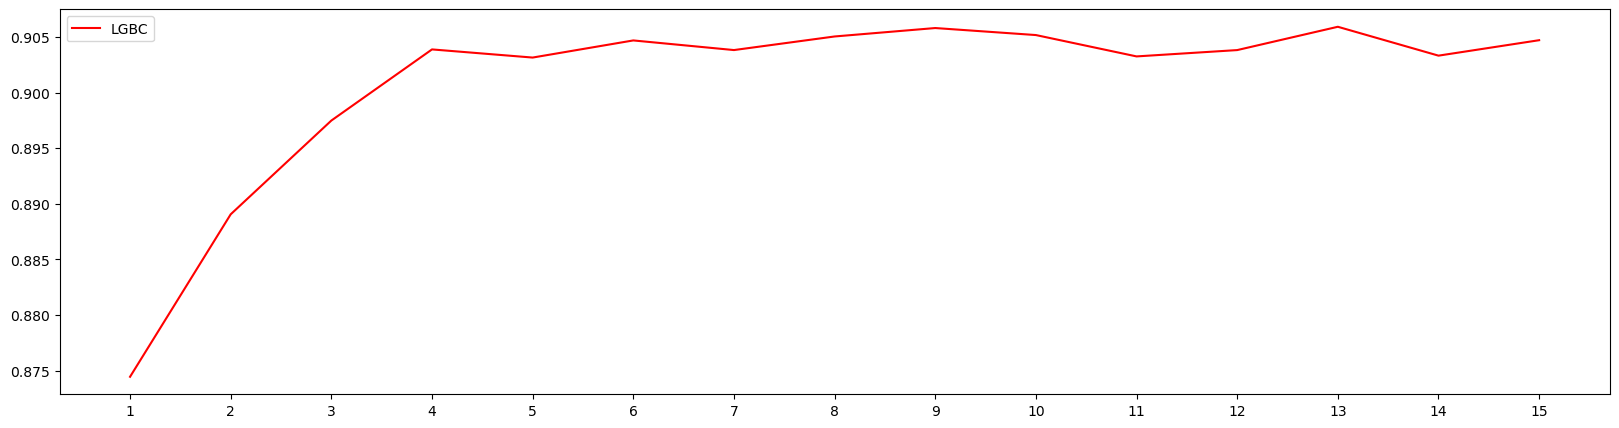

In [59]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = range(1,16,1)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = i,
                                        num_leaves = 16,
                                        min_child_samples= 110,
                                        min_child_weight= 0.18,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('max_depth={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

num_leaves=256, max_auc=0.916594448963307


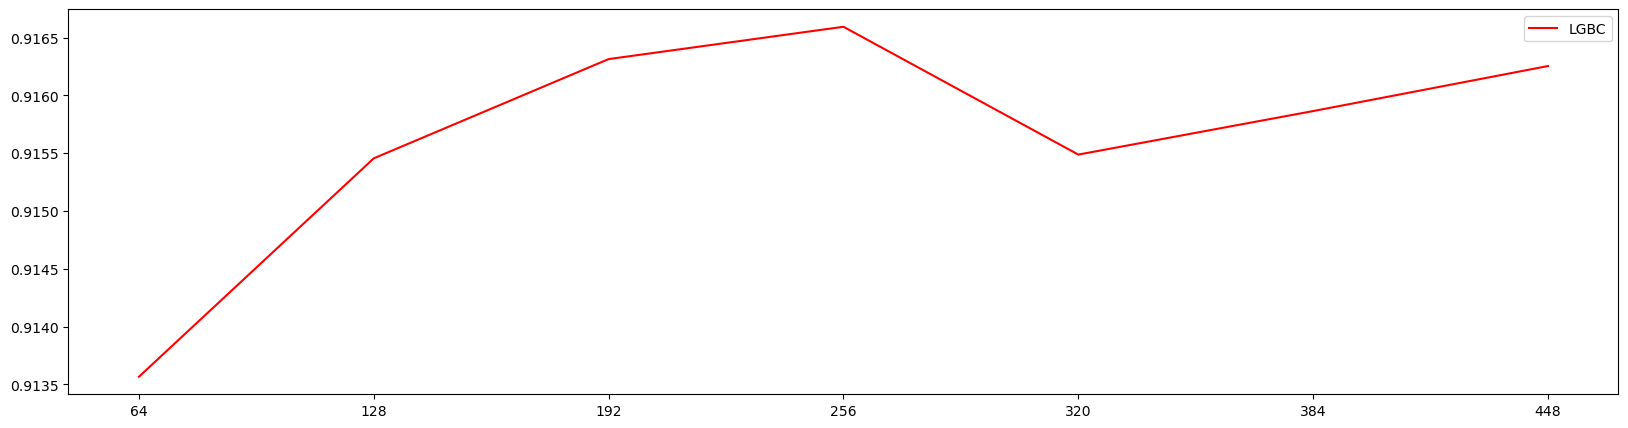

In [60]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = range(64,512,64)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = 13,
                                        num_leaves = i,
                                        min_child_samples= 110,
                                        min_child_weight= 0.18,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('num_leaves={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

colsample_bytree=1.0, max_auc=0.916594448963307


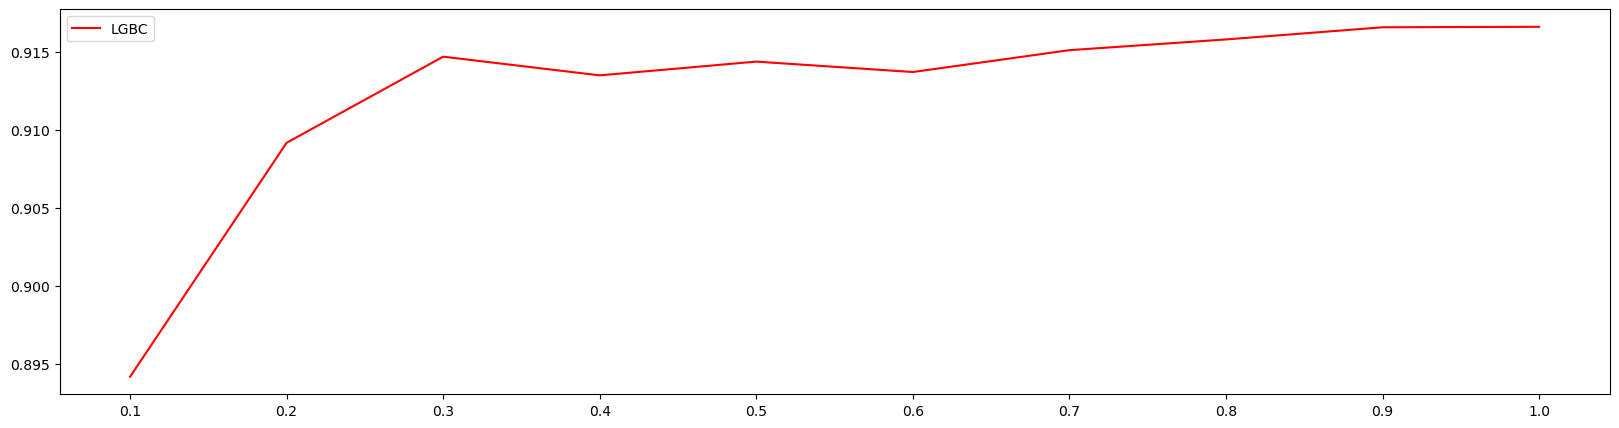

In [61]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = np.linspace(0.1,1,10)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = 13,
                                        num_leaves = 256,
                                        min_child_samples= 110,
                                        min_child_weight= 0.18,
                                        colsample_bytree = i,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('colsample_bytree={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

subsample=0.1, max_auc=0.916594448963307


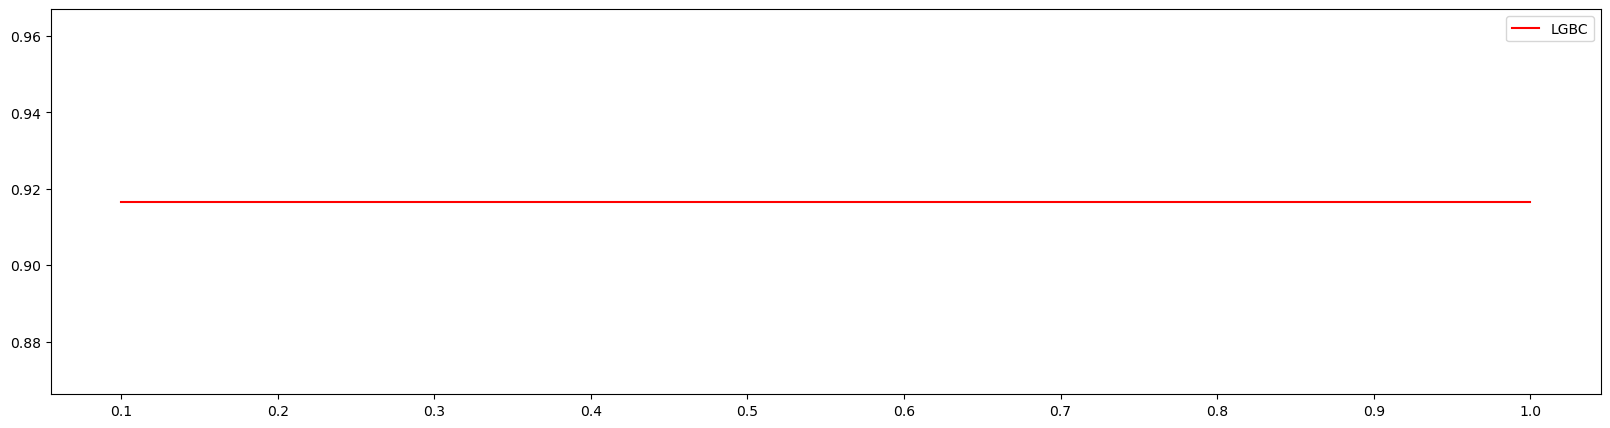

In [62]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = np.linspace(0.1,1,10)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = 13,
                                        num_leaves = 256,
                                        min_child_samples= 110,
                                        min_child_weight= 0.18,
                                        colsample_bytree = 1,
                                        subsample = i,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('subsample={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

reg_alpha=0.8, max_auc=0.9175790848306515


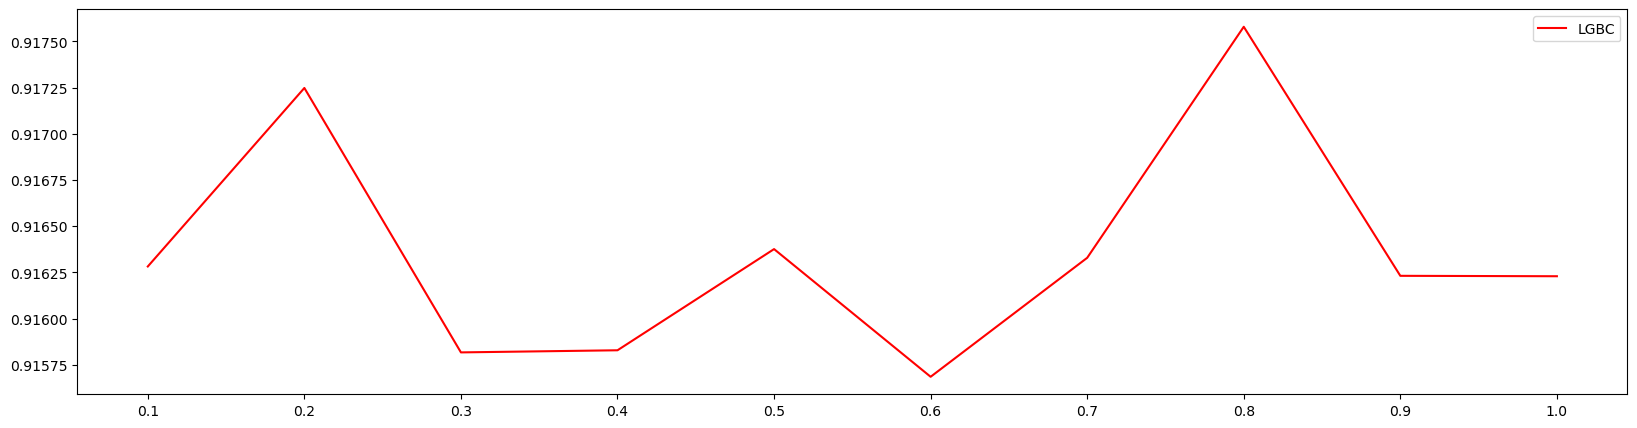

In [63]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = np.linspace(0.1,1,10)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = 13,
                                        num_leaves = 256,
                                        min_child_samples= 110,
                                        min_child_weight= 0.18,
                                        colsample_bytree = 1,
                                        subsample = 0.1,
                                        reg_alpha= i,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('reg_alpha={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

reg_lambda=0.8, max_auc=0.916868783960342


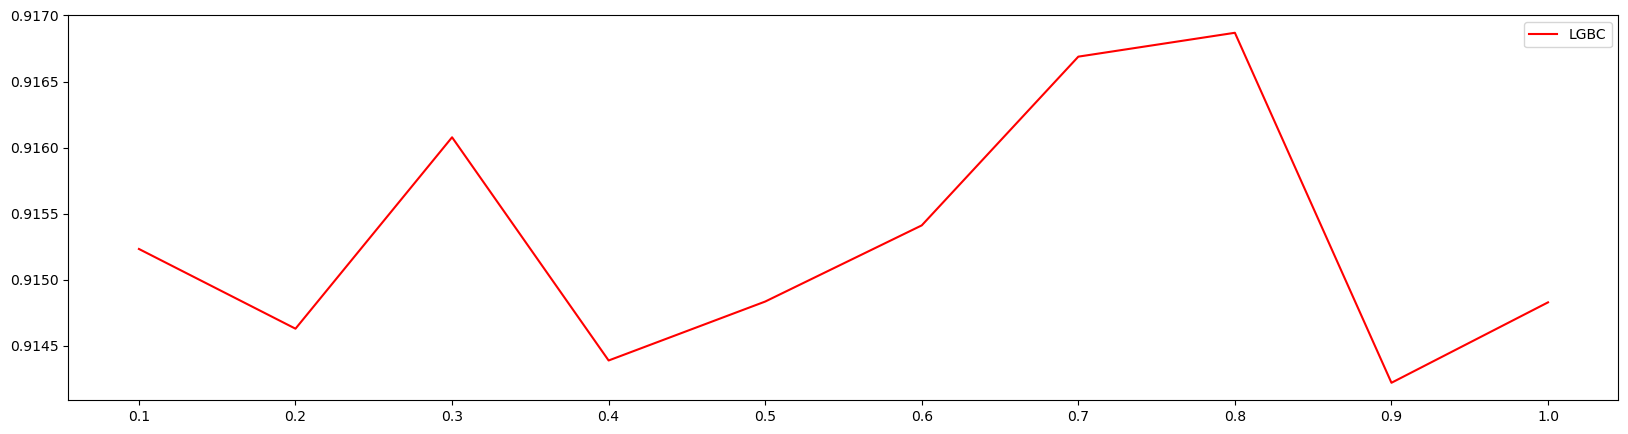

In [64]:
def adjust(x_train,y_train,x_test, y_test):
    axisx = np.linspace(0.1,1,10)
    test_aucs = []
    for i in axisx:
        lgb_model = lgb.LGBMClassifier(n_estimators=1000,
                                        learning_rate = 0.2,
                                        max_depth = 13,
                                        num_leaves = 256,
                                        min_child_samples= 110,
                                        min_child_weight= 0.18,
                                        colsample_bytree = 1,
                                        subsample = 0.1,
                                        reg_alpha= 0.8,
                                        reg_lambda= i,
                                        verbosity = -1,
                                        random_state= 42)
        clf = lgb_model.fit(x_train, y_train,
                  eval_set=[(x_train, y_train),(x_test,y_test)],
                  eval_metric='auc')
        test_auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
        test_aucs.append(test_auc)
    print('reg_lambda={}, max_auc={}'.format(axisx[test_aucs.index(max(test_aucs))], max(test_aucs)))
    plt.figure(figsize=(20,5))
    plt.plot(axisx, test_aucs,c="red",label="LGBC")
    plt.xticks(axisx)
    plt.legend()
    plt.show()
adjust(X_new, y_new, X_KBest_test, y_KBest_test)

In [65]:
clf = lgb.LGBMClassifier(n_estimators=1000,
                        learning_rate = 0.2,
                        max_depth = 13,
                        num_leaves = 256,
                        min_child_samples= 110,
                        min_child_weight= 0.18,
                        colsample_bytree = 1,
                        subsample = 0.1,
                        reg_alpha= 0.8,
                        reg_lambda= 0.8,
                        verbosity = -1,
                        random_state= 42)

clf.fit(X_new, y_new, eval_set=[(X_KBest_test, y_KBest_test)], eval_metric='auc')
eval_results = clf.evals_result_

y_pred_Best = clf.predict(X_KBest_test)

roc_auc_score(y_KBest_test, y_pred_Best)

0.6675682885700036

train_auc =  1.0
test_auc =  0.916868783960342


D:\Temp\ipykernel_23496\1621282234.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--', c='r')


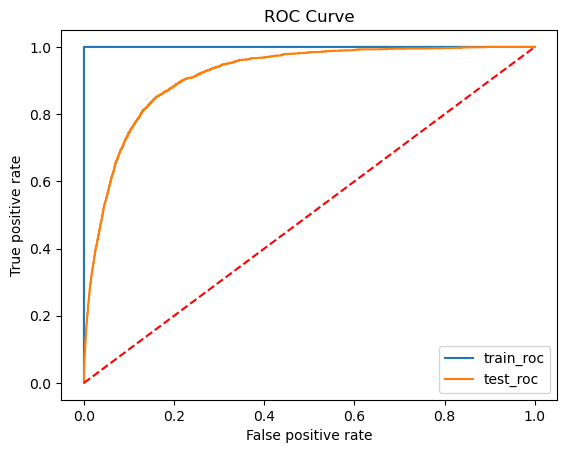

In [66]:
roc_auc_plot(clf, X_new, y_new, X_KBest_test, y_KBest_test)

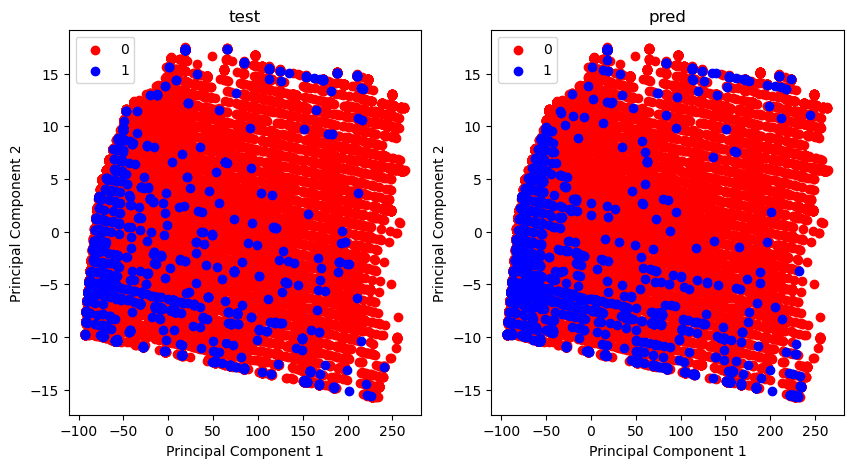

In [67]:
classificaton_plot(X_KBest_test, y_KBest_test, y_pred_Best)